<a href="https://colab.research.google.com/github/Johyeonje/Deep_Learning_Books/blob/master/%ED%8F%AC%EB%A5%B4%ED%86%A0_%EC%84%B8%EA%B5%AC%EB%A1%9C_%EC%95%88%EC%A0%84_%EC%9A%B4%EC%A0%84%EC%9E%90_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

# 소개

문제 유형 : Binary Classification (이중 클래스 분류)    

대상 : 착한 운전자와 나쁜 운전자에게 부여되는 자동차 보험금에 대한 예측

# 평가 척도

**[정규화 지니 계수]**   
   
Normalized Gini Coefficient (정규화 지니 계수) : 불균형의 정도를 나타내는 통계학적 지수   
경제학에서 먼저 소개되었던 개념으로 누적 소득의 합을 나타낸 그래프에 대해 사용되었다.

다음 그래프는 로렌츠 곡선(Lorenz Curve)

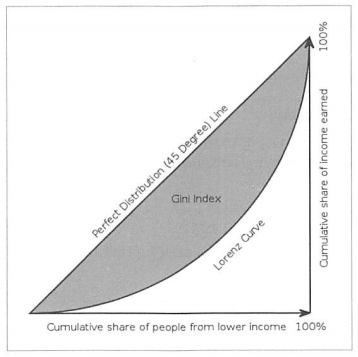

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/gini_graph.png', width=400)

다음 그래프는 경제 인구를 소득순으로 나열한 후 누적 소득을 그래프로 나타낸 것이다.   
구성원의 소득이 일정할 경우 45도 직선이 그려지지만 현실의 부의 불균형에 의해 위와 같이 볼록한 곡선을 띄게 된다.   
지니 계수는 회색 Gini Index의 면적을 삼각형 전체 면적으로 나눈 값이다.   
즉 불균형이 높을수록 Gini Index가 커진다.

이제 경제요소르 제외한 지니 계수에 대한 의미를 확인해보면

In [ ]:
# Prediction (예측)
predictions = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 
               0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
# Actual (정답)
actual = [1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]

파이썬으로 구현된 지니 계수 함수를 사용

In [ ]:
def gini(actual, pred):
  assert (len(actual) == len(pred))
  all = np.asarray(np.c_[actual, pred, np.arange(len(actual))],
        dtype=np.float)
  all = all[np.lexsort((all[:,2], -1 * all[:,1]))]
  print(all[:,0])
  totalLosses = all[:,0].sum()
  print('Line 7, all[:,0].cumsum().sum() : {0}, totalLosses : {1} '%(all[:,0].cumsum().sum() / totalLosses))
  giniSum = all[:, 0].cumsum().sum() / totalLosses
  print('Line 9 , giniSum : ',giniSum)
  print('Line 10 , (len(actual)+1)/2. : ',(len(actual)+1)/2.)
  giniSum -= (len(actual) + 1) / 2.
  return giniSum / len(actual)

def gini_normalized(actual, pred):
  return gini(actual, pred) / gini(actual, actual)

위 예측값에 대한 실제 지니 계수, 최대 지니 계수, 정규화 지니 계수 값을 구한다.

In [ ]:
import numpy as np

gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini = gini_normalized(actual, predictions)

print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % 
      (gini_predictions, gini_max, ngini))

# 결과값

[1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
Line 7, all[:,0].cumsum().sum() : {0}, totalLosses : {1} 
Line 9 , giniSum :  10.833333333333334
Line 10 , (len(actual)+1)/2. :  8.0
[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Line 7, all[:,0].cumsum().sum() : {0}, totalLosses : {1} 
Line 9 , giniSum :  12.5
Line 10 , (len(actual)+1)/2. :  8.0
[1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
Line 7, all[:,0].cumsum().sum() : {0}, totalLosses : {1} 
Line 9 , giniSum :  10.833333333333334
Line 10 , (len(actual)+1)/2. :  8.0
[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Line 7, all[:,0].cumsum().sum() : {0}, totalLosses : {1} 
Line 9 , giniSum :  12.5
Line 10 , (len(actual)+1)/2. :  8.0
Gini: 0.189, Max. Gini: 0.300, Normalized Gini: 0.630


지니 계수가 도출된 식을 살펴보려면 먼저 정답값을 예측값의 오름차순으로 정렬한다.

In [ ]:
data = zip(actual, predictions)
sorted_data = sorted(data, key=lambda d: d[1])
sorted_actual = [d[0] for d in sorted_data]
print('Sorted Actual Values', sorted_actual)

# 예측값의 오름차순으로 정렬된 정답

Sorted Actual Values [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


정렬된 정답값의 누적의 그래프는 다음과 같다. 이것이 로렌츠 곡선이다.

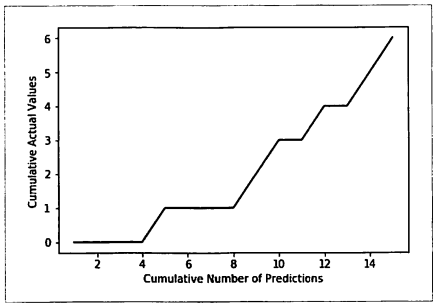

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/gini_graph2.png', width=400)

그래프 X, Y축을 정규화한 후, 그래프 양끝 지점을 잇는 45도 직선을 그리고 삼각형 하단 영역을 다음과 같이 구분한다.

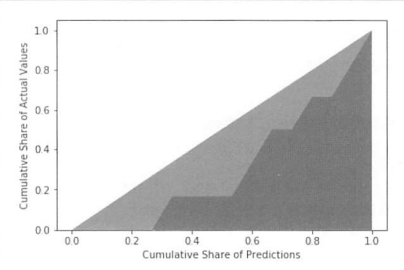

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/gini_graph3.png', width=400)

본 그래프의 회색 영역의 면적이 실제 지니 계수인 0.189 이다.   
만약 예측 확률이 100% 였다면 아래 그래프와 같아진다.

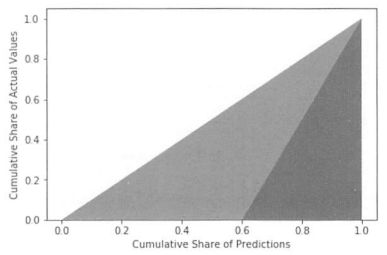

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/gini_graph4.png', width=400)

예측 확률이 100%인 그래프의 회색 영역의 면적은 최대 지니계수인 0.300 이다.   
지니 계수를 최대 지니 계수로 나누면 정규화 지니 계수 값을 얻을 수 있다.
```
# 지니 계수 / 최대 지니 계수 = 정규화 지니 계수
0.189 / 0.300 = 0.630
```

지니 계수는 예측값들의 상대적 순서를 기준으로 점수를 계산한다.   
그러므로, 예측된 확률 값의 크기 혹은 예측값들 간의 상대적 점수 격차는 고려되지 않는다.   
자동차 보험 청구를 할 확률이 낮은 고객부터 확률이 높은 고객 순서로 정렬 후, 지니 계수를 얻는다.   
정규화 지니 계수는 0에 가까울수록, 예측 모델의 정확도가 낮다는 의미이며 1에 가까울 수록 성능이 좋음을 의미한다.   
   
정규화 지니 계쑤는 0에 가까울 수록, 예측 모델의 정확도가 낮다는 의미이며 1에 가까울 수록 성능이 좋다는 뜻이다.   
경진대회 목적이 운전자 A가 내년에 보험을 청구할 확률을 예측하는 것이다.   
학습 데이터는 59만, 테스트 데이터는 89만개의 운전자 데이터를 포함한다.   
변수는 운전자마다 익명화된 58개 변수이다.

# 주요 접근

##[피처 엔지니어링]

* 결측값의 개수를 기반으로 파생 변수를 생성   
* 범주형 변수를 원-핫 인코딩 해서 새로운 변수 생성
* 특정 변수 그룹을 문자열로 통합하여 변수 그룹 내 조합을 나타내는 새로운 변수 생성
* 전체 데이터에서 변수 고유값별 빈도 등의 기초 통계값을 파생변수로 사용

##[모델]

LightGMB를 사용, 테이블형 데이터 학습에 최적화된 GBDT 라이브러리로 학습이 제일 빠르다

##[앙상블]

케라스 기반의 인공 신경망 모델을 추가로 학습 단일 모델로는 성능이 우수하지 않지만 LightGBM 모델과 앙상블을 수행할 때 큰 성능 개선을 보임

#데이터 준비

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c porto-seguro-safe-driver-prediction

Saving kaggle.json to kaggle.json
  0% 0.00/2.12M [00:00<?, ?B/s]
100% 2.12M/2.12M [00:00<00:00, 71.3MB/s]
 97% 43.0M/44.4M [00:00<00:00, 159MB/s]
100% 44.4M/44.4M [00:00<00:00, 217MB/s]
 60% 18.0M/30.0M [00:00<00:00, 184MB/s]
100% 30.0M/30.0M [00:00<00:00, 191MB/s]


In [ ]:
!unzip '/content/test.csv.zip'
!unzip '/content/sample_submission.csv.zip'
!unzip '/content/train.csv.zip'

Archive:  /content/test.csv.zip
  inflating: test.csv                
Archive:  /content/sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  /content/train.csv.zip
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/train.csv', na_values=['-1', '-1.0'])
test_df = pd.read_csv('/content/test.csv', na_values=['-1', '-1.0'])

print(train_df.shape, test_df.shape)

(595212, 59) (892816, 58)


In [ ]:
train_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


train 데이터의 head를 살펴보면 column 명이 알아보기 힘들게 익명화되어 있음을 알수 있다.   
또한 몇개의 변수는 NaN을 포함하고 변수명이 _bin으로 끝나는 변수들은 이진 변수임을 알 수 있다.   
_cat으로 끝나는 변수는 범주형 변수라는 뜻이다.   
na_values에서 지정한 인수 -1은 NaN을 의미하며 불러와진 데이터의 일부가 NaN으로 되어있는 것을 확인할 수 있었다.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   594996 non-null  float64
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595129 non-null  float64
 6   ps_ind_05_cat   589403 non-null  float64
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

데이터 자료형은 int64형과 float64형으로 통일 되어있으며 몇개의 변수에서 약간의 null값을 포함한다.   
경진대회에서 예측할 타겟 변수 'target'의 분포를 살펴보자

In [ ]:
np.unique(train_df['target'])

array([0, 1])

In [ ]:
1.0 * sum(train_df['target'])/train_df.shape[0]

0.036447517859182946

타겟 데이터는 0과 1로 구성되어 있으며 전체 데이터중 3.6%의 운전자가 보험을 청구했다.   
타겟 변수가 1일 확률이 매우 낮은 불균형 데이터이다.

###데이터 시각화

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 분석의 편의를 위해 변수 유형별로 구분한다
# 이진 변수
binary = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 
          'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
# 범주형 변수
category = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
            'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
            'ps_car_10_cat', 'ps_car_11_cat']
# 정수형 변수
integer = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 
           'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 
           'ps_calc_14', 'ps_car_11']
# 소수형 변수
floats = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

데이터 시각화를 위해 훈련 데이터와 테스트 데이터를 단일 데이터로 통합

In [ ]:
# 테스트 데이터의 'target' 변수를 결측값으로 설정한다.
test_df['target'] = np.nan

# 훈련 데이터와 테스트 데이터를 통합한 새로운 데이터(df)를 생성한다.
new_df = pd.concat([train_df, test_df], axis=0)

# 히스토그램 그래프 시각화를 위한 함수
def bar_plot(col, data, hue=None):
  f, ax = plt.subplots(figsize=(10,5))
  sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
  plt.show()

def dist_plot(col, data):
  f, ax = plt.subplots(figsize=(10,5))
  sns.distplot(data[col].dropna(), kde=False, bins=10)
  plt.show()

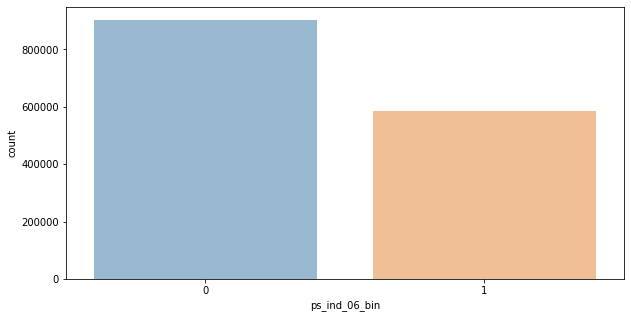

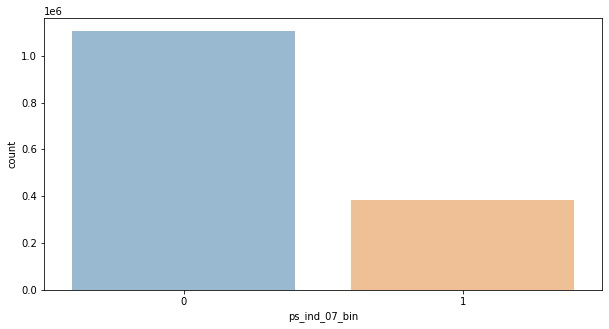

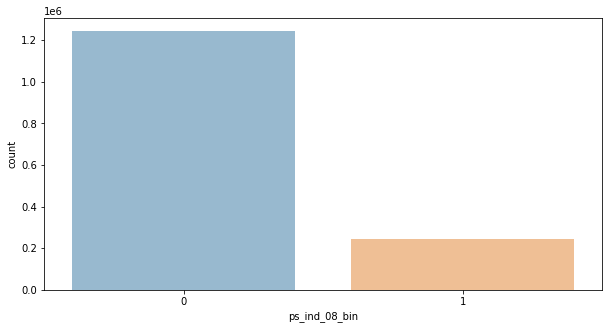

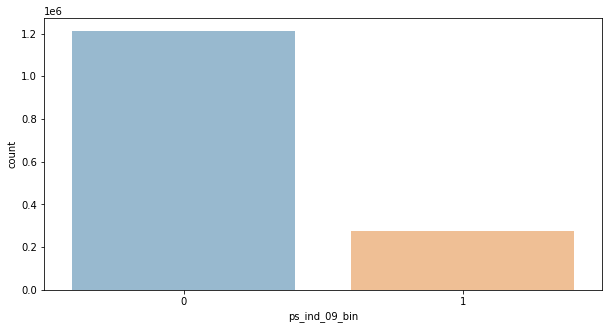

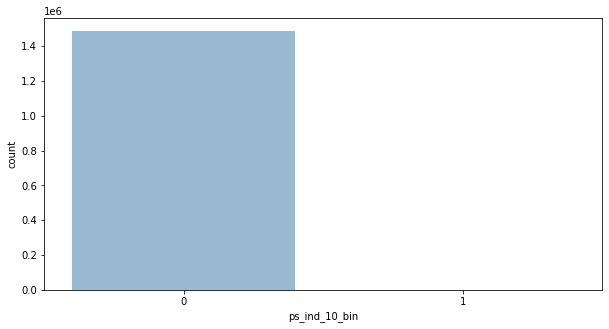

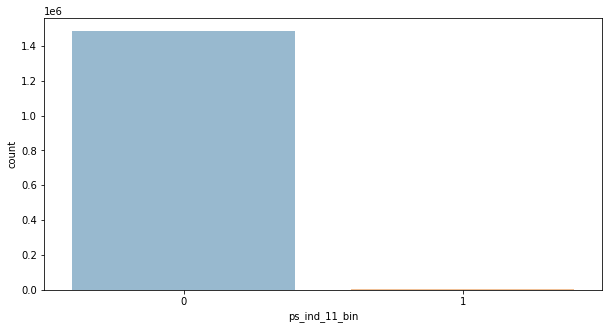

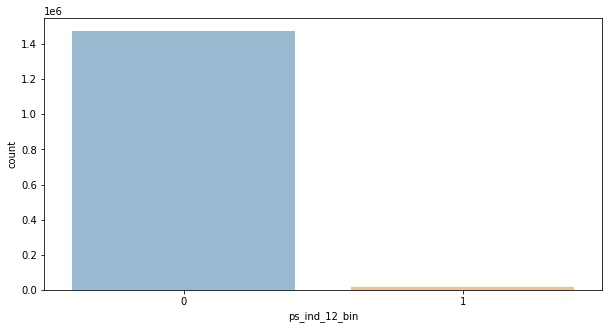

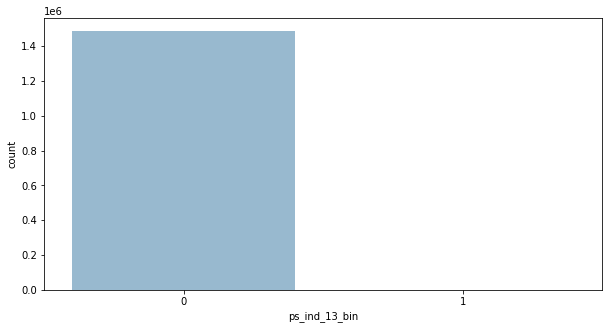

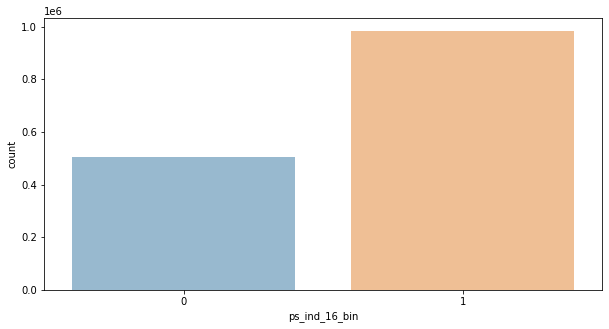

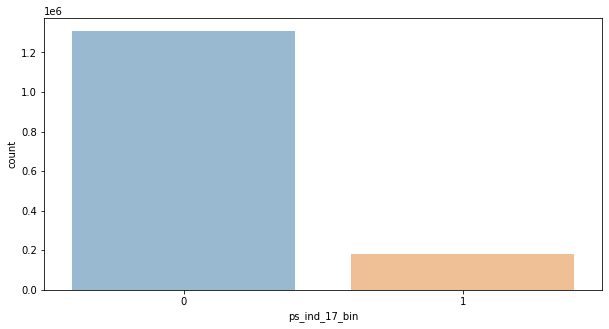

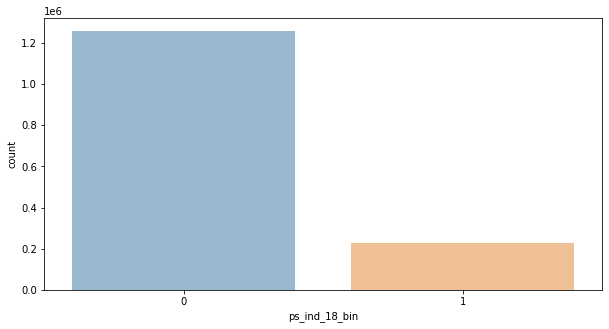

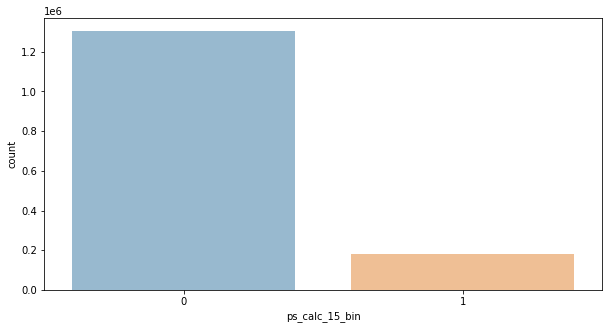

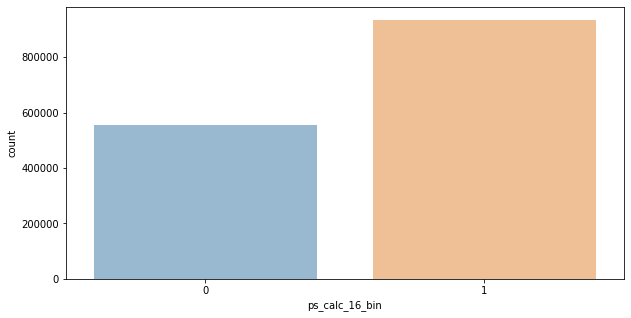

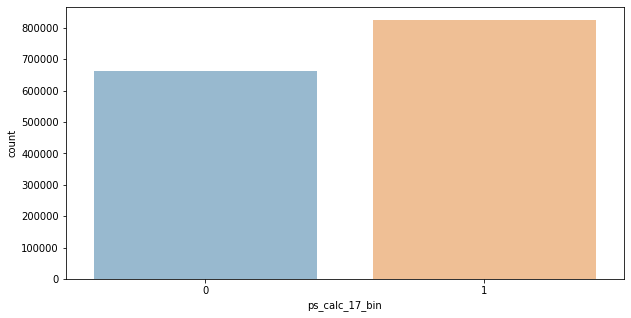

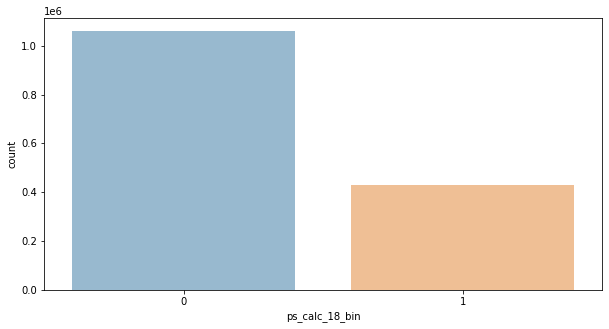

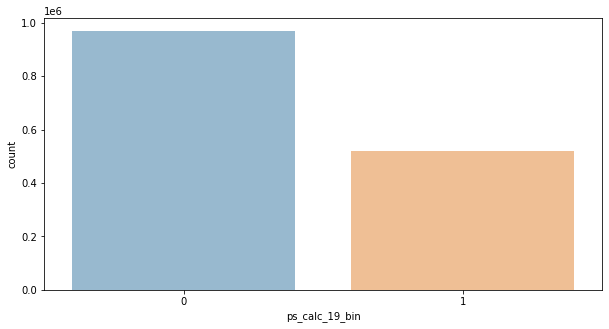

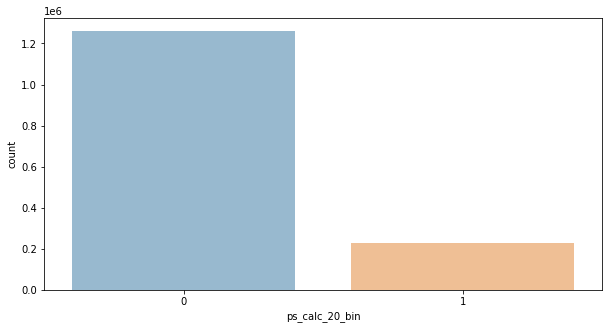

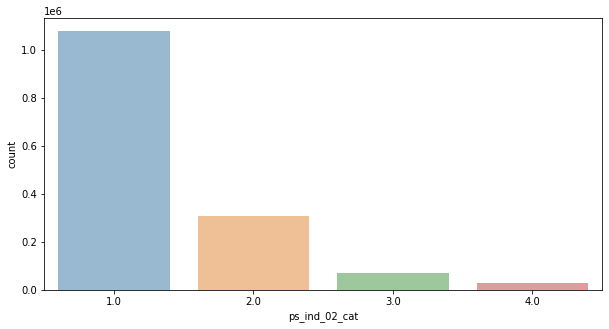

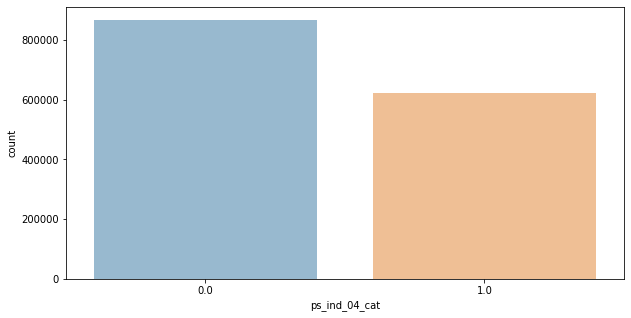

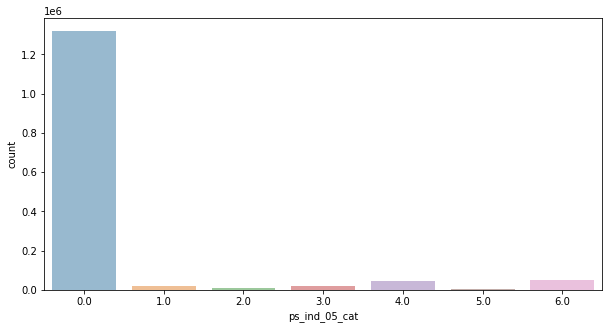

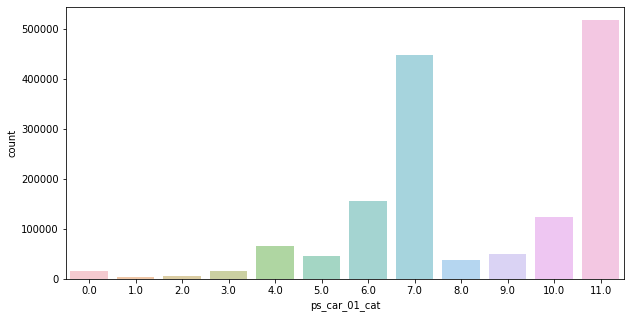

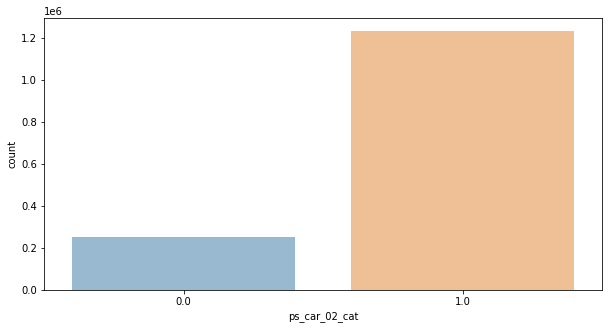

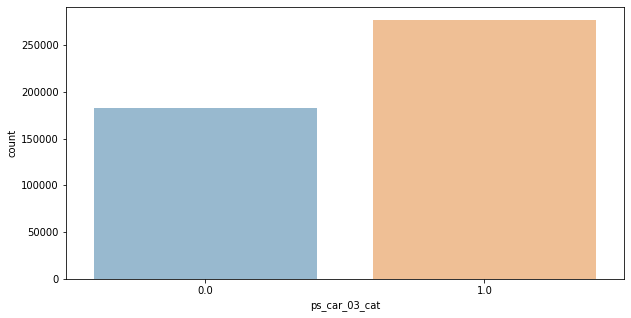

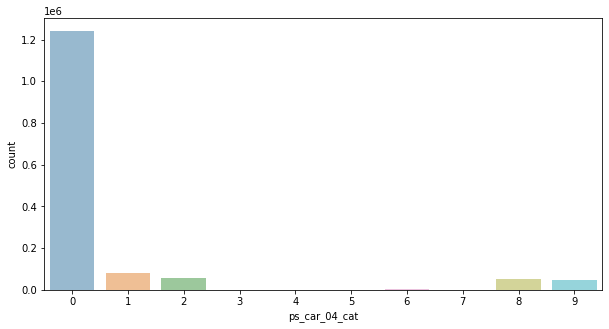

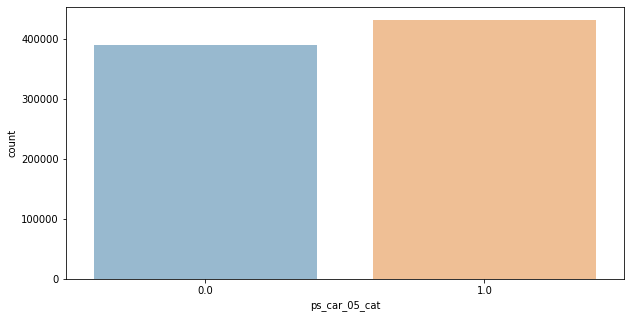

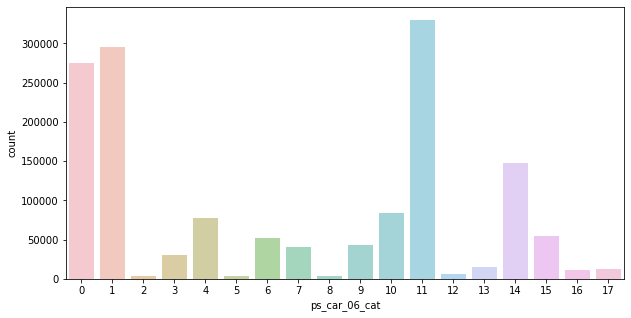

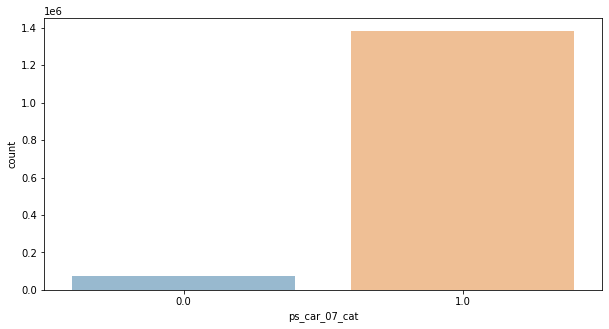

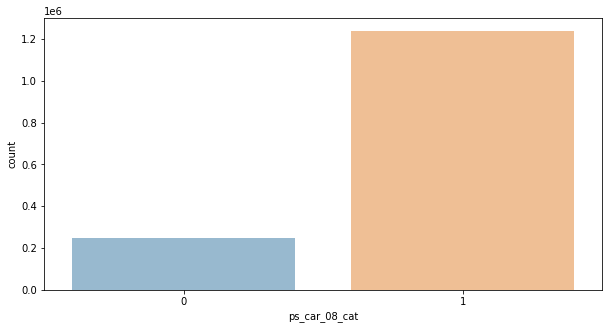

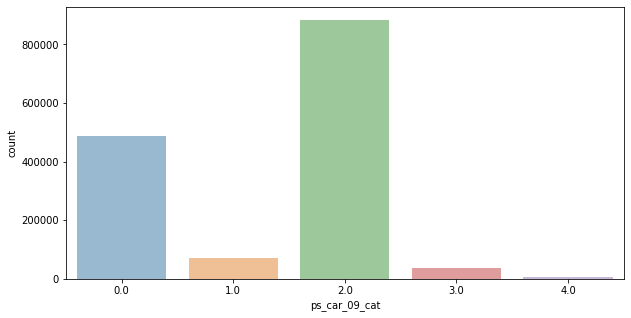

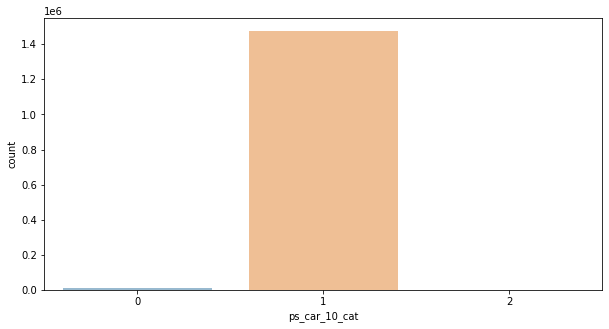

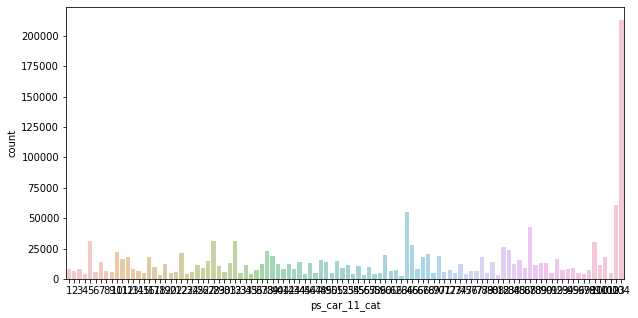

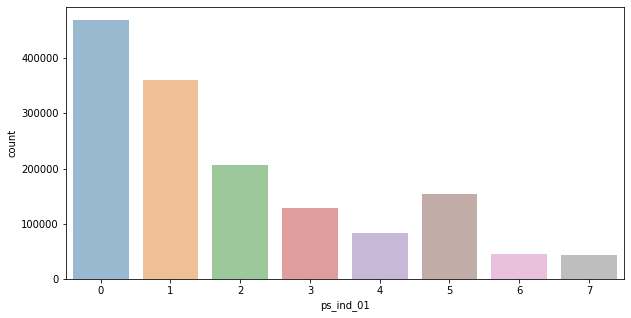

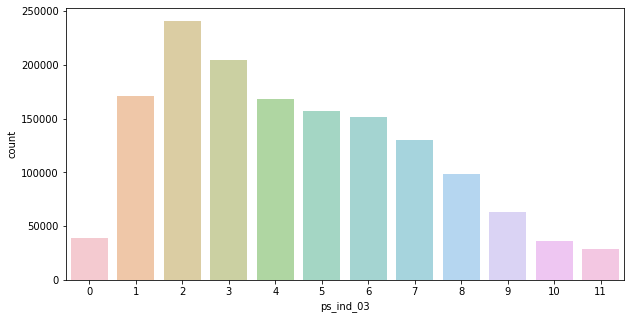

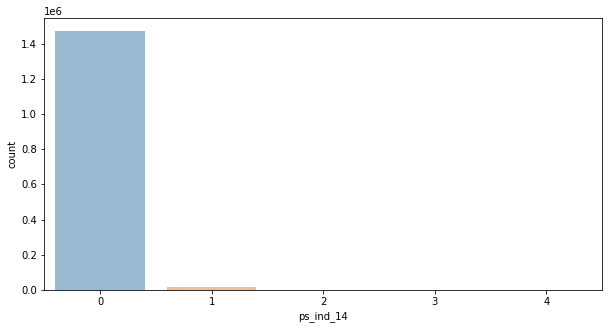

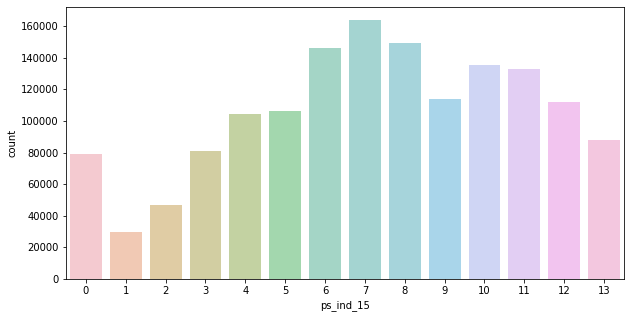

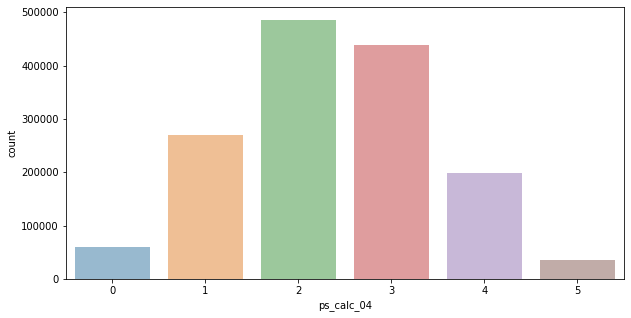

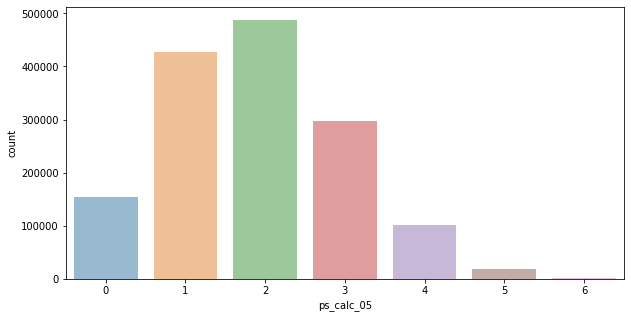

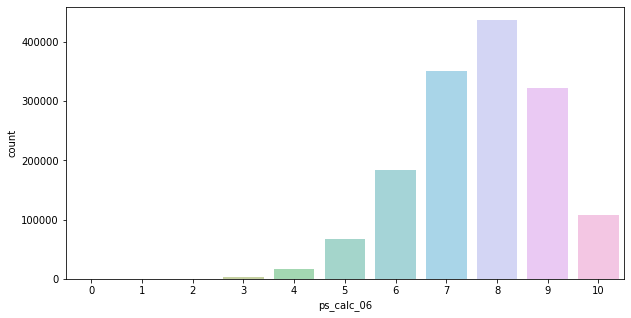

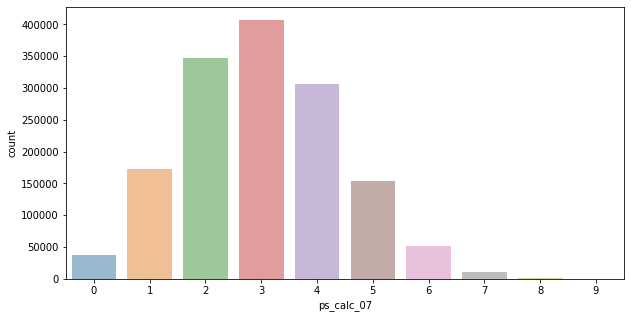

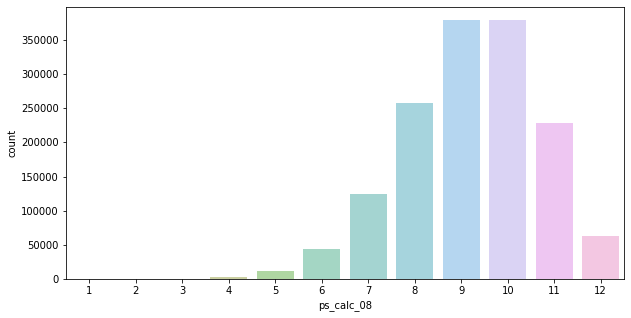

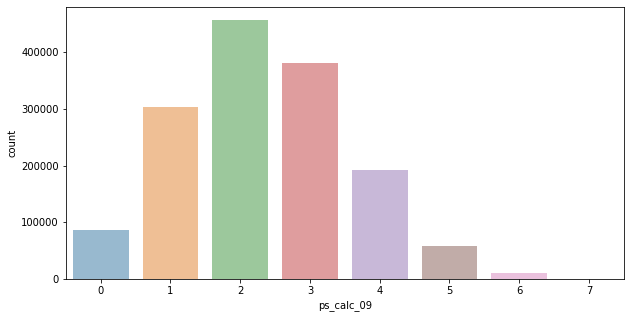

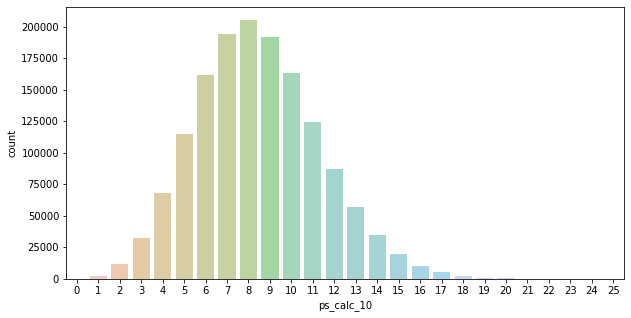

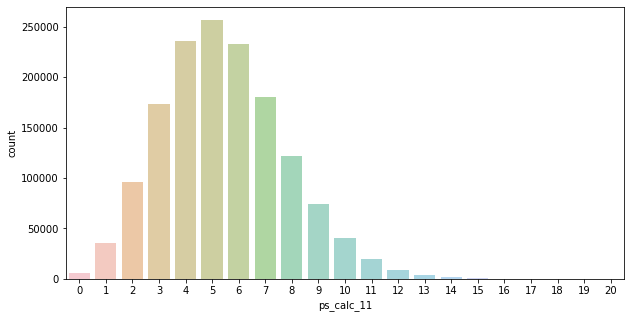

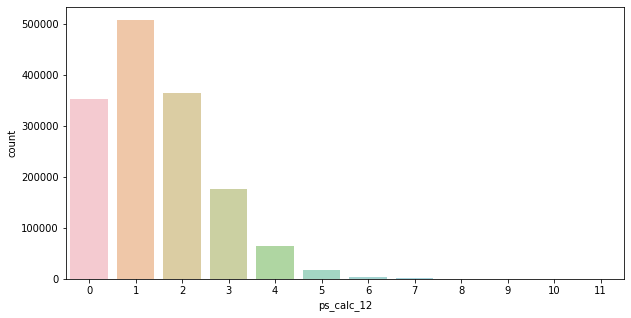

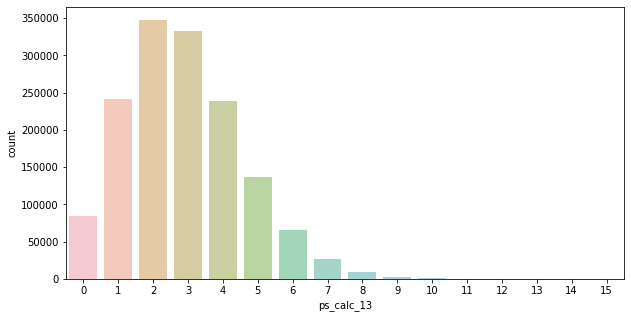

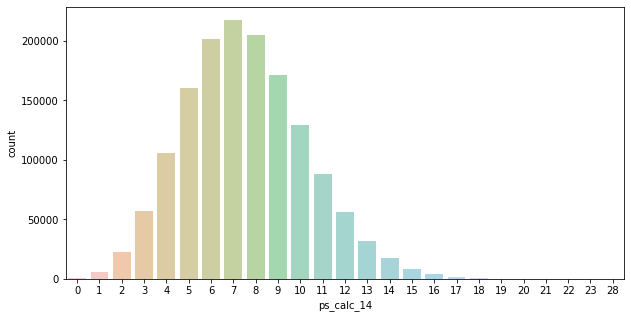

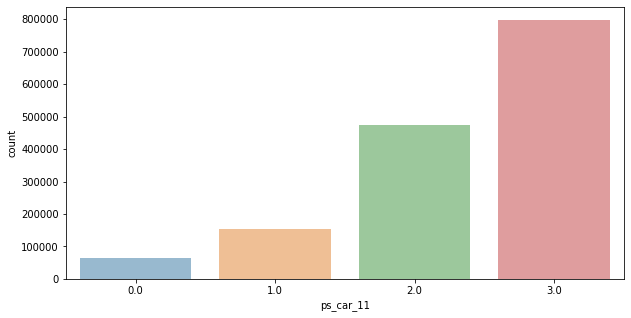

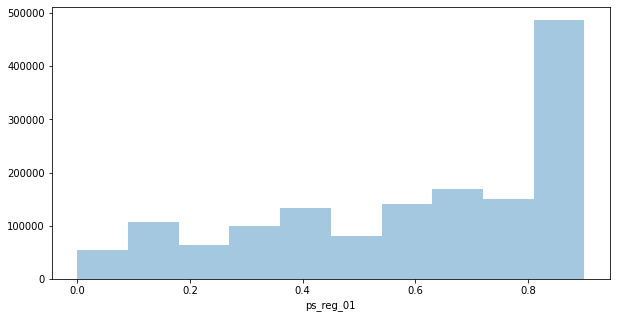

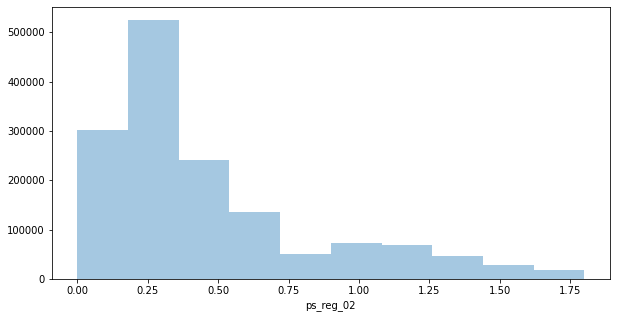

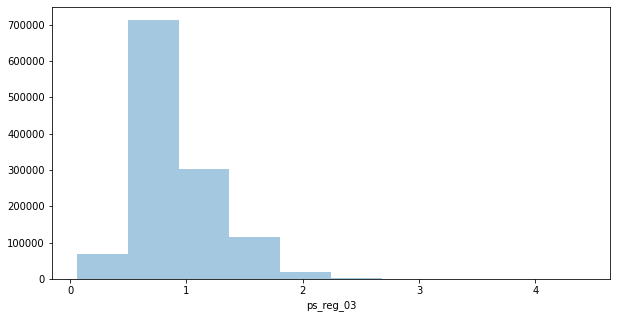

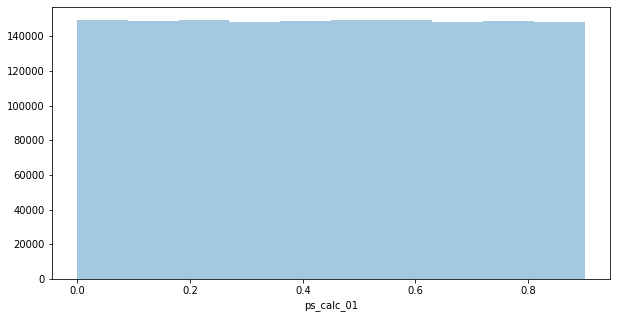

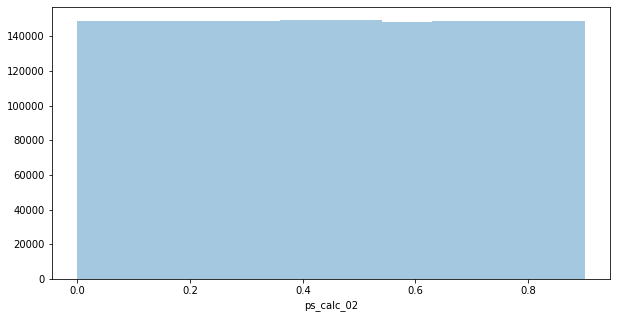

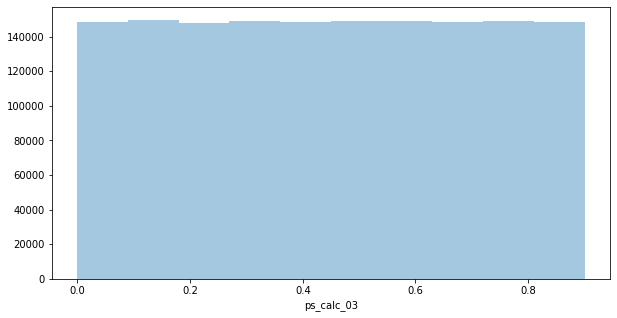

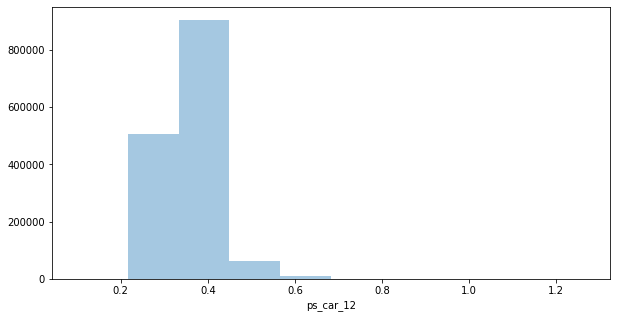

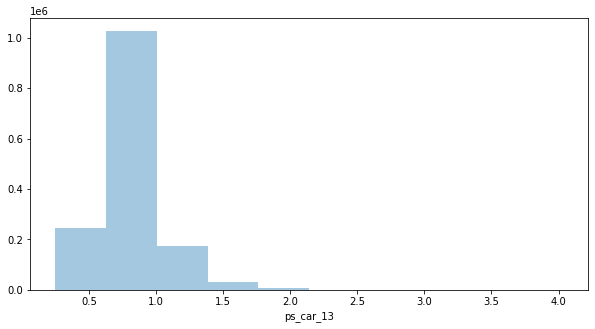

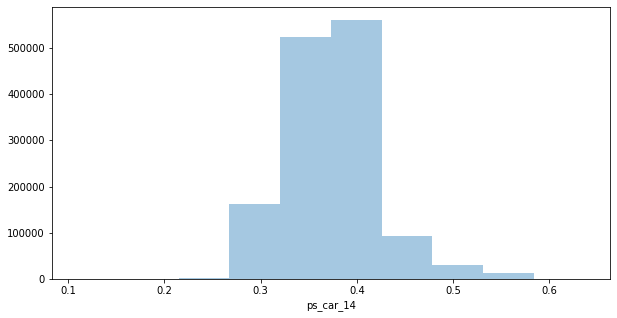

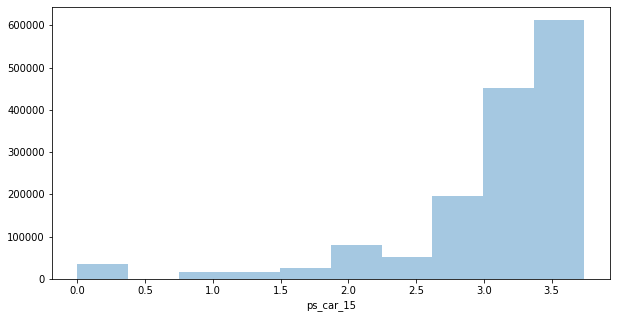

In [ ]:
# 이진 변수, 범수형 변수 그리고 정수형 변수 시각화
for col in binary + category + integer:
  bar_plot(col, new_df)

# 소수형 변수 시각화
for col in floats:
  dist_plot(col, new_df)

* 이진 변수들을 분석해보면 10~13정도의 히스토그램은 거의 값이 0에 치중되어있다.
* 범주형 변수들을 분석해보면 고유값이 2개부터 100개 이상의 범주형 변수가 존재한다.
* 정수형 변수를 분석해보면 정규 분포와 같이 보이는 변수도 존재하고 한쪽에 쏠린 분포도 보인다.
* 소수형 변수를 분석해보면 균등 분포를 보이는 변수도 있고 한쪽에 쏠려있는 변수도 있다.

하지만 모든 변수가 익명화 되어있어서 시각화 만으로 데이터를 깊게 이해하기 힘들다.   
하지만 익명 변수 이름이 그룹화 되어있기도 하기때문에 군집별 분석은 가능할 수 있다.

##변수 간 상관관계

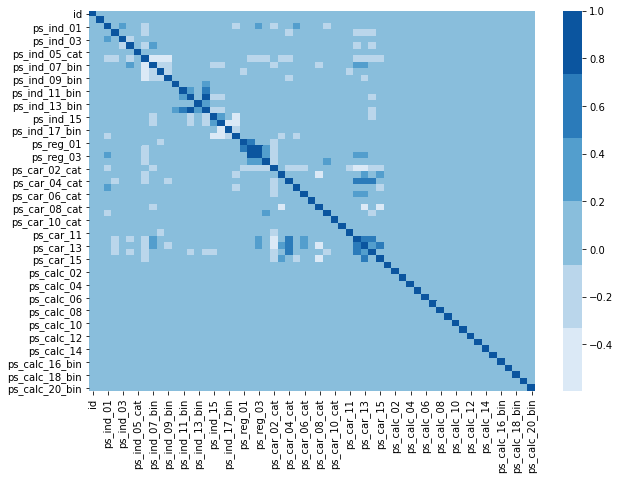

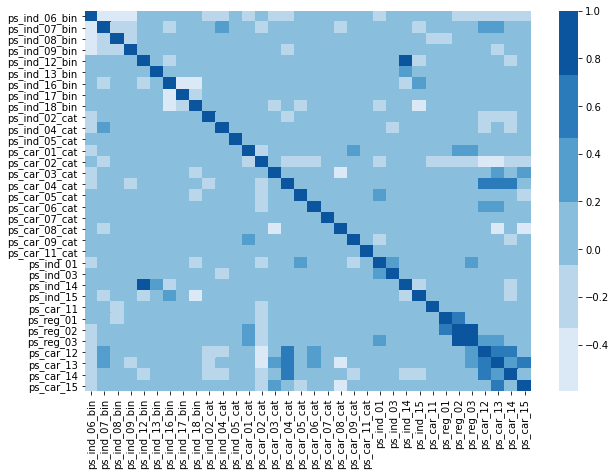

In [ ]:
# 전체 데이터에 대한 상관관계 HeatMap 시각화
corr = new_df.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

# 일부 변수만 선별
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
          'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
          'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
          'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
          'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

corr_sub = new_df[features].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_sub, cmap=cmap)

전체 변수에 대해 시각화 한 결과 상관관계를 찾기 어려웠고, 일부 변수를 선별하여 HeatMap을 그려보니 ps_ind_14와 ps_ind_12_bin 두 변수가 0.89의 높은 상관관계를 보였다. 그외는 0.5~0.6 가량의 상관관계를 보였다.   
일반적으로 0.95 이상의 상관관계를 갖는 경우 둘 중 하나의 변수를 제거하지만 최고 0.89 수준이기 때문에 그래도 진행한다.

## 단일 변수와 타겟 변수의 비율

단일 변수의 고유값 별 타겟 변수에 대한 비율의 시각화하여 확인해보자   
검정색 직선은 95% 신뢰구간을 의미한다.

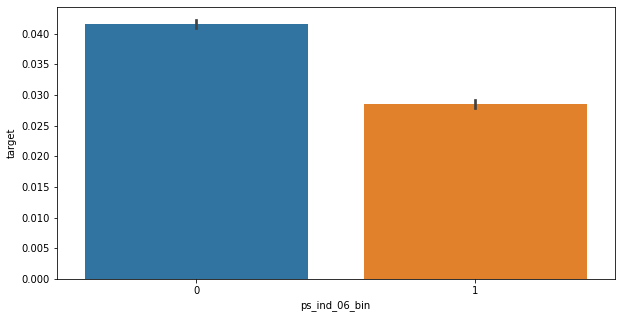

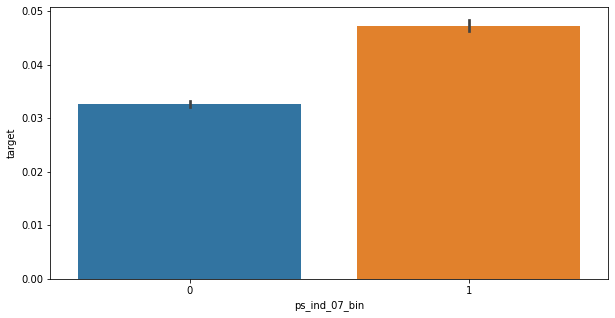

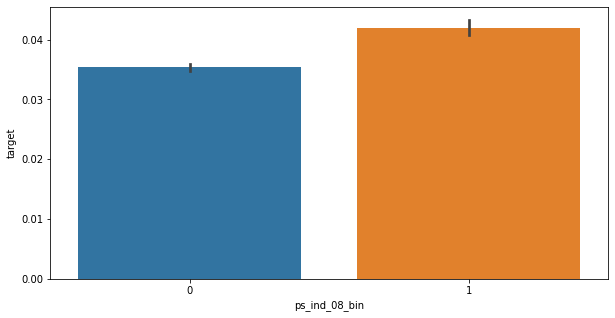

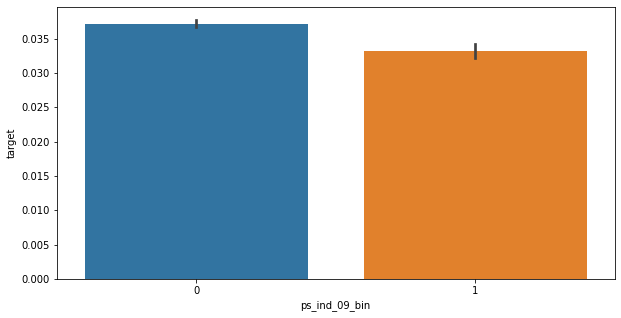

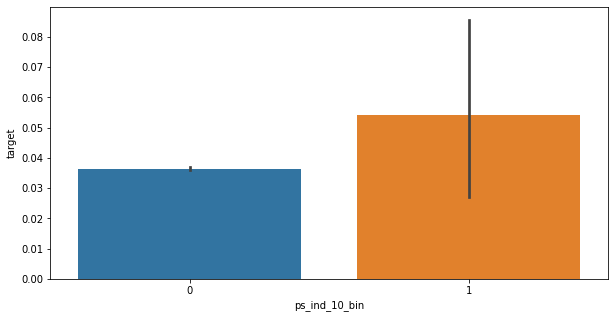

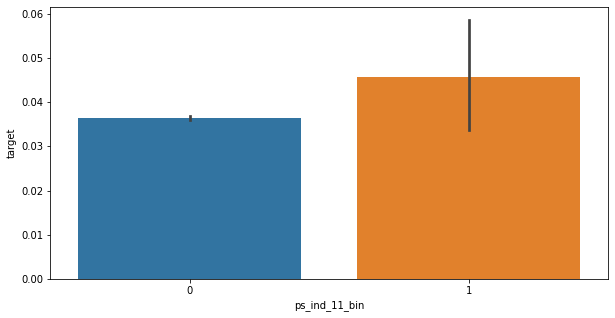

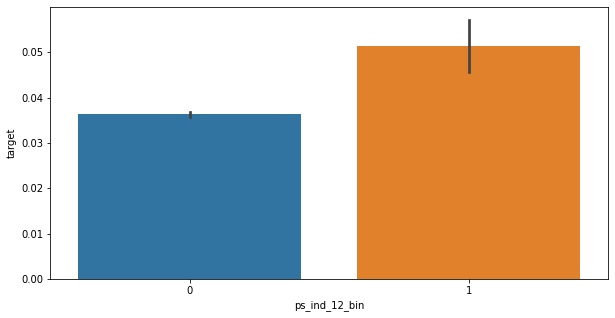

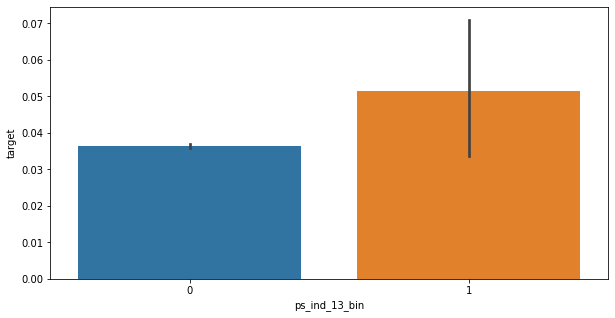

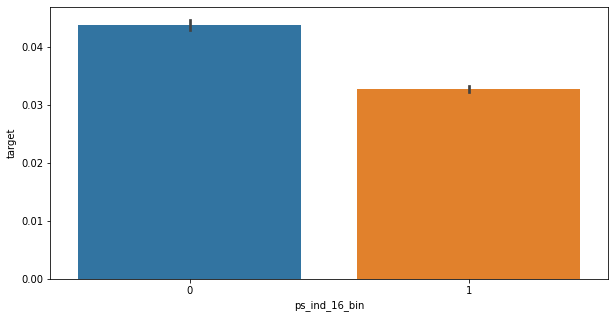

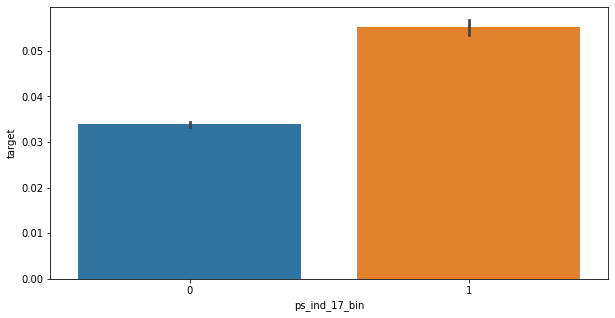

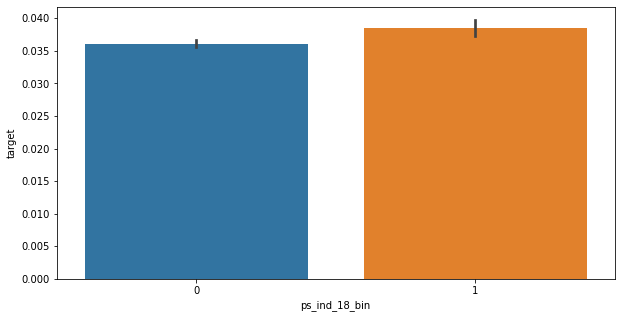

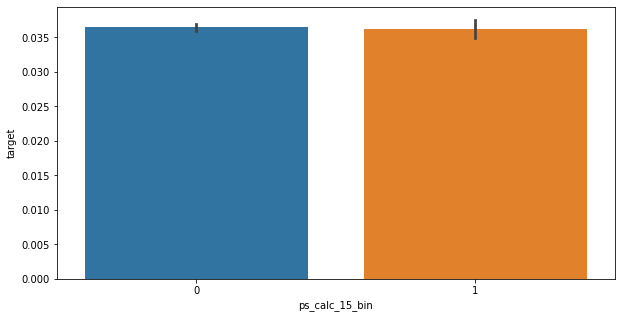

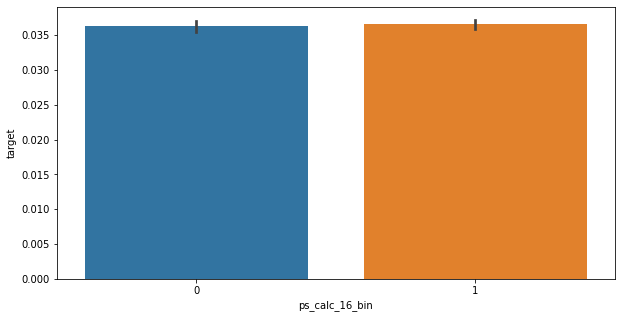

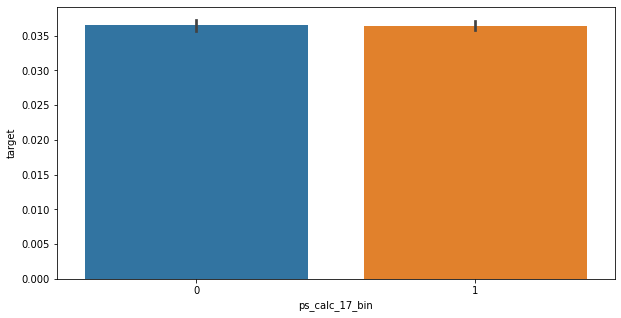

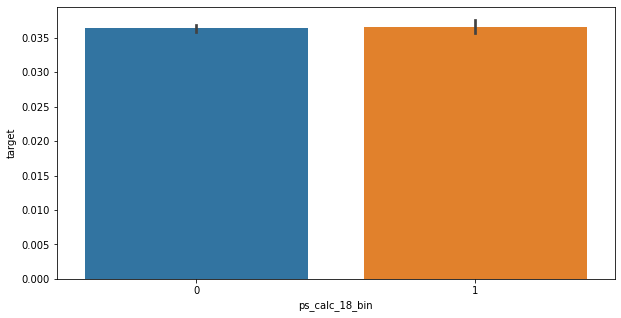

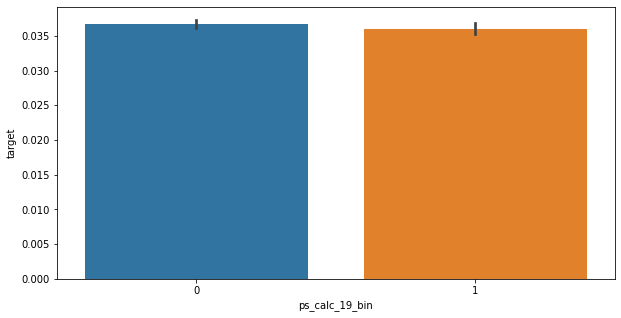

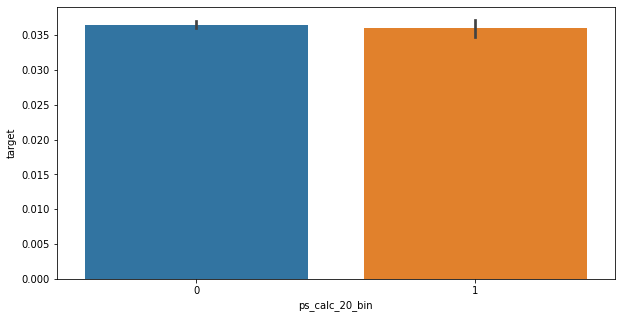

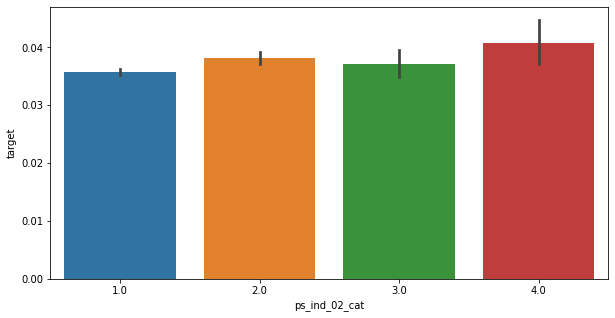

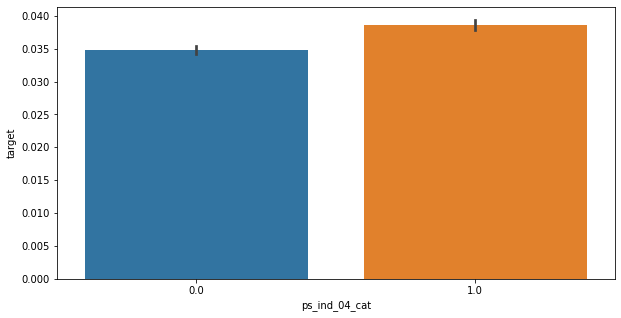

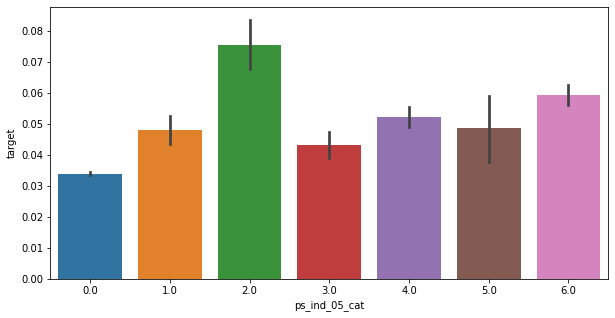

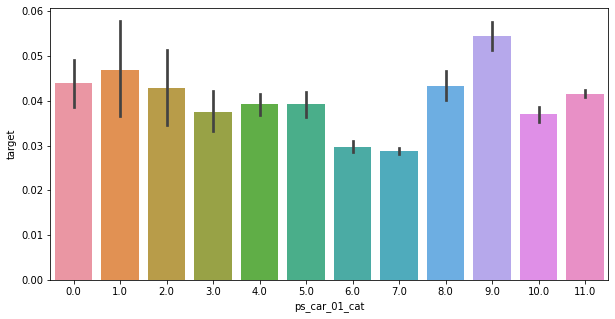

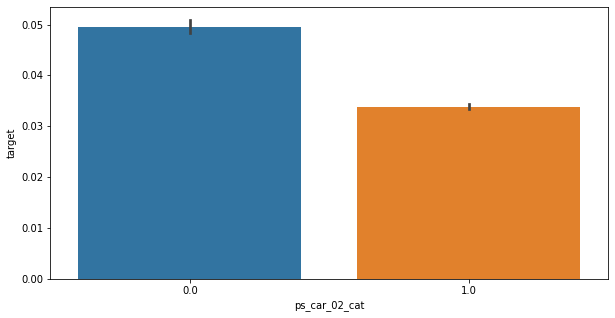

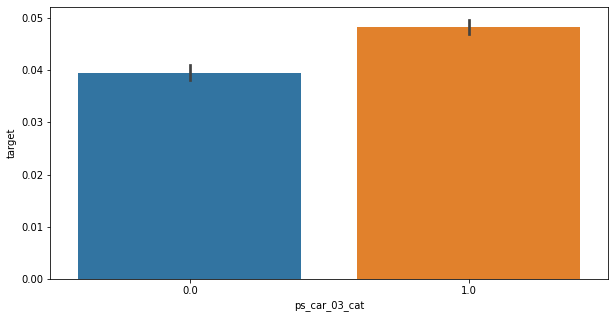

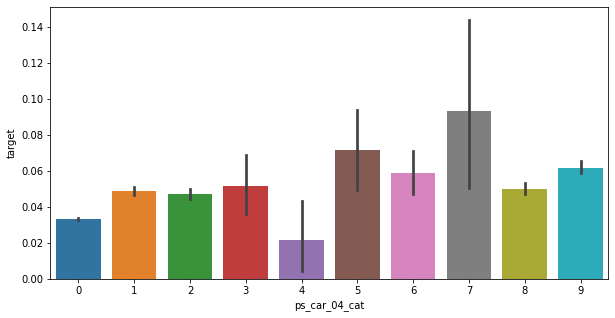

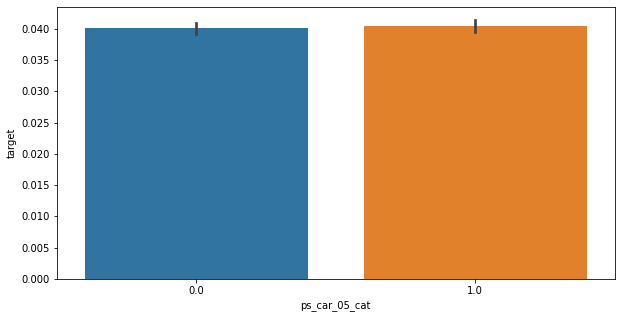

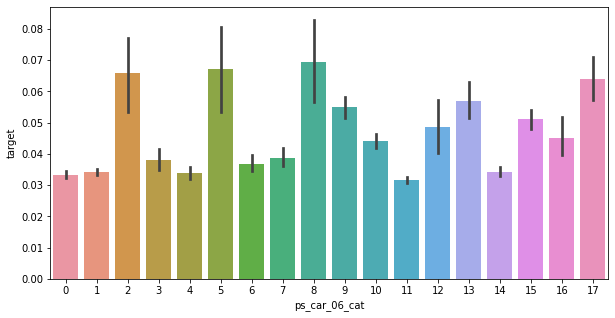

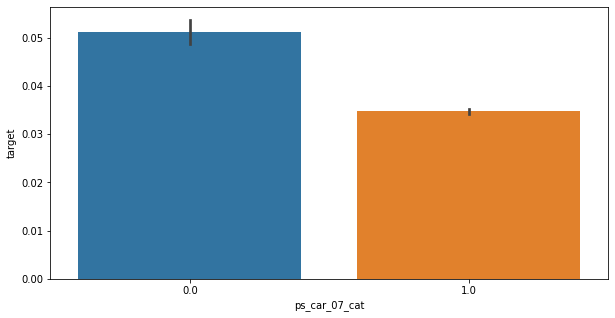

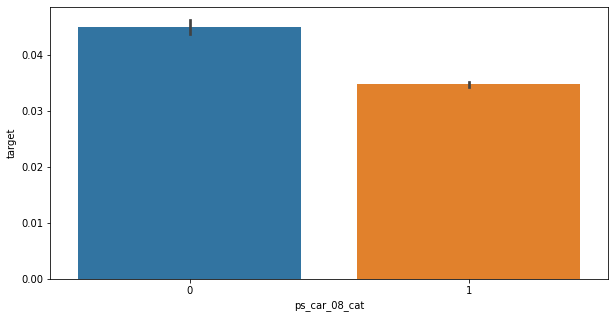

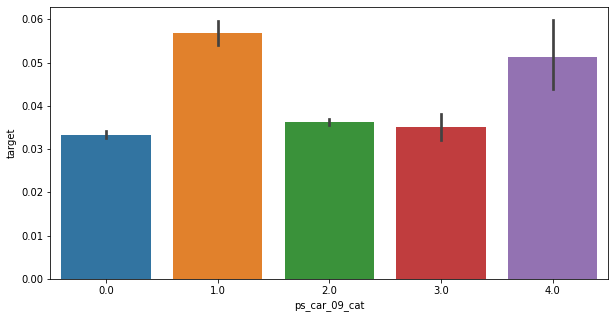

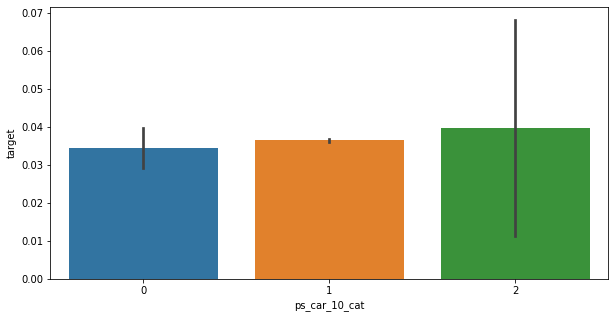

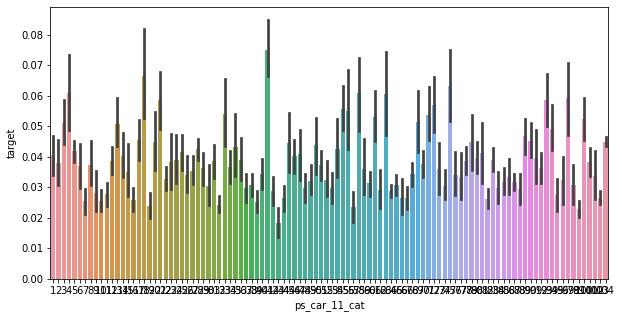

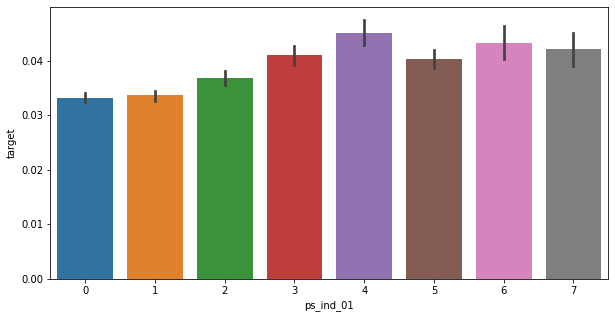

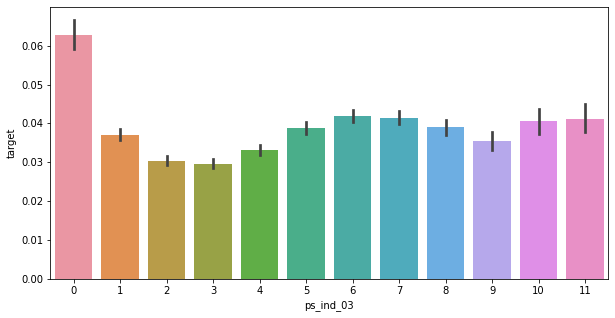

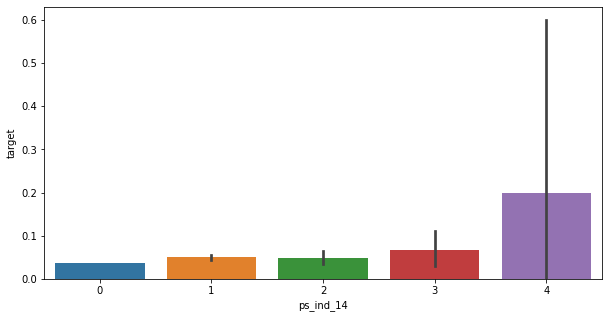

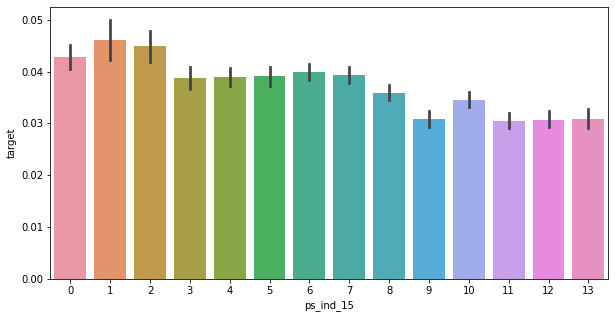

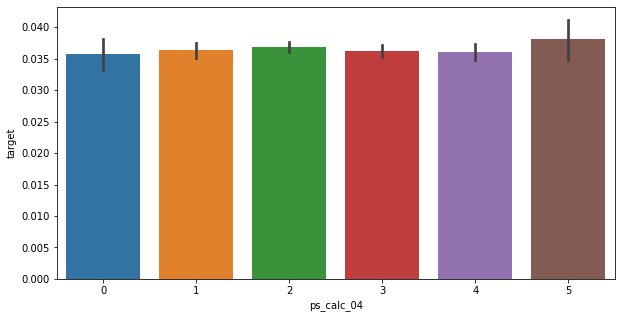

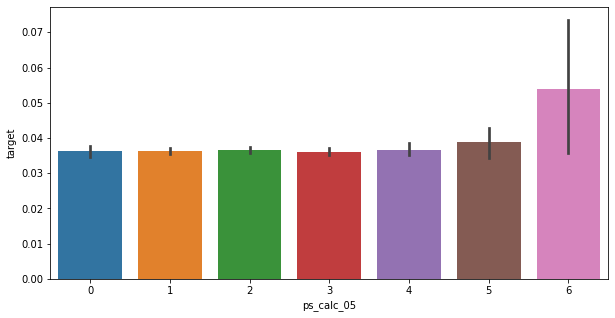

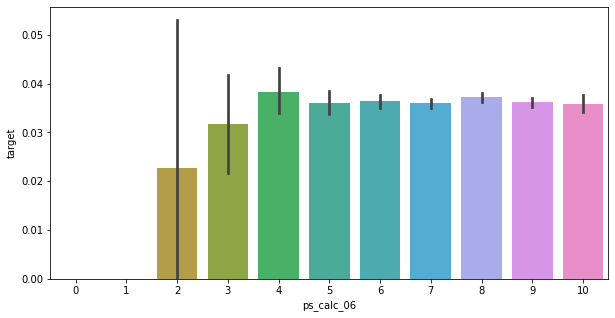

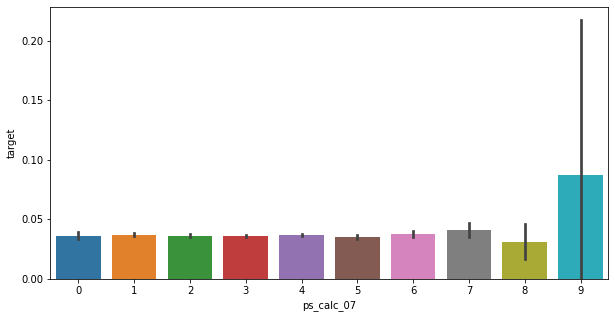

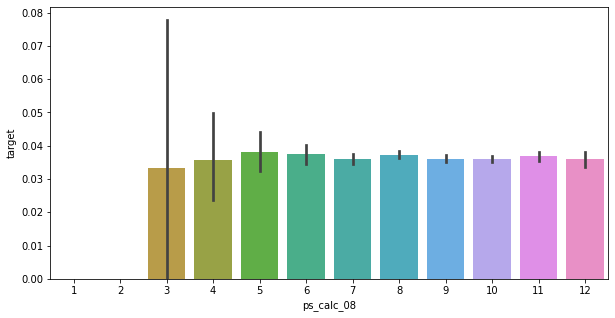

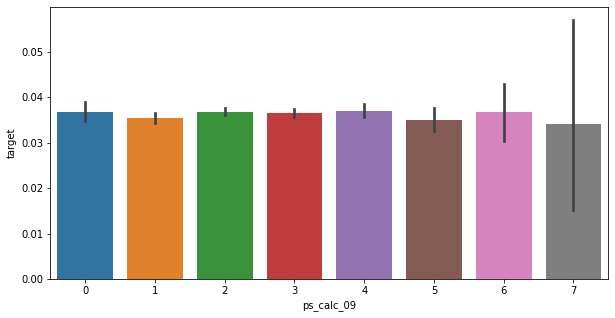

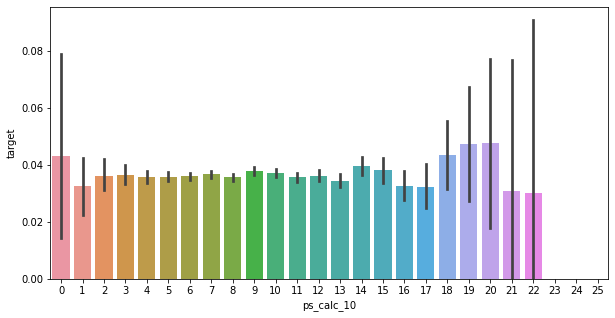

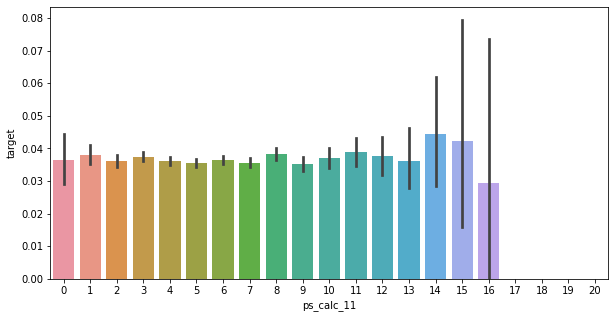

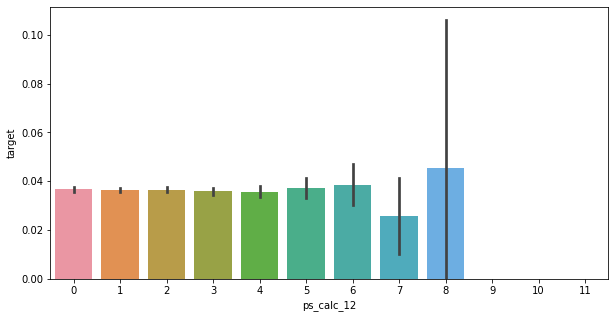

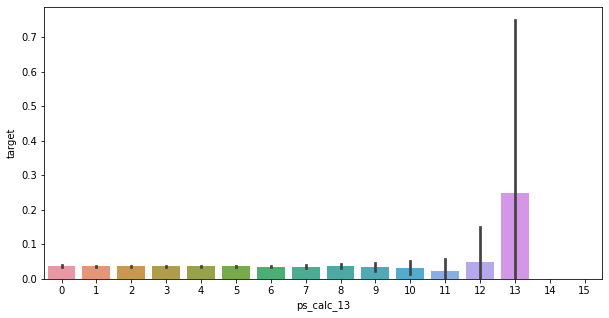

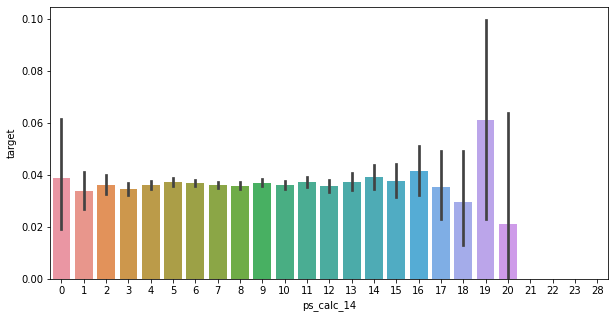

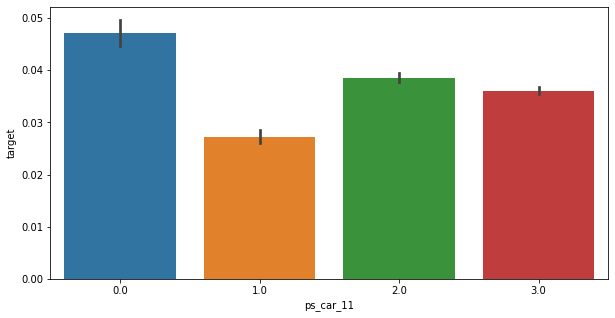

In [ ]:
def bar_plot_ci(col, data):
  f, ax = plt.subplots(figsize=(10,5))
  sns.barplot(x=col, y='target', data=data)
  plt.show()

# 이진 변수, 범주형 변수, 정수형 변수 시각화
for col in binary+category+integer:
  bar_plot_ci(col, new_df)

* 이진 변수
  * 앞서 보이는 ps_ind_16_bin, ps_ind_06_bin 두 변수는 이진 변수의 값에 따라 타겟 변수의 비율이 달라 통계적 유효성도 충분히 지닌 두 변수가 모델리 관점에서 유용한 변수임을 예측할 수 있다.
  * 반면에 ps_ind_11_bin은 통계적 유효성이 없다.
  * ps_calc_18_bin은 평균 타겟 비율이 큰 차이가 없어 예측 능력이 낮은 변수임을 알 수 있다.

## 훈련 데이터와 테스트 데이터 비교

* 학습에 영향을 주는 데이터는 훈련 데이터 뿐이므로 만약 훈련 데이터와 테스트 데이터가 많이 다르다면 잘 훈련된 모델이라고 하더라도 테스트 데이터의 예측에 좋은 성능을 보이기 힘들다.
* 분포의 시각화를 통해 두 데이터의 유사도를 확인한다.

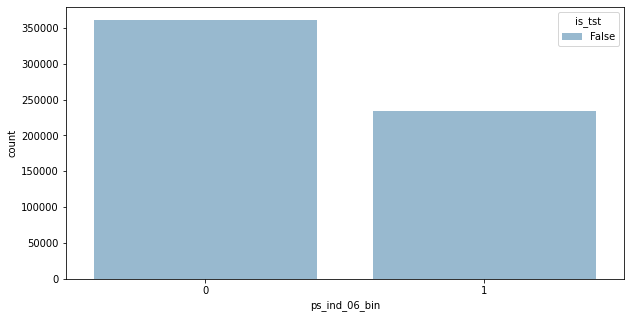

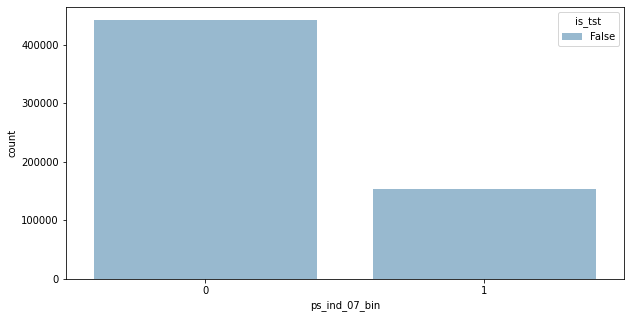

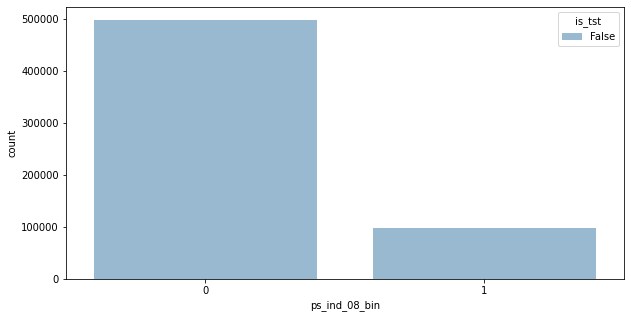

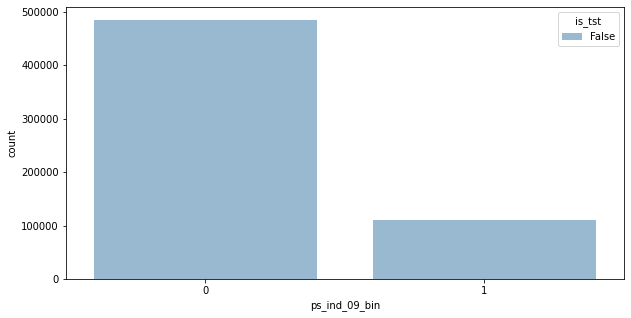

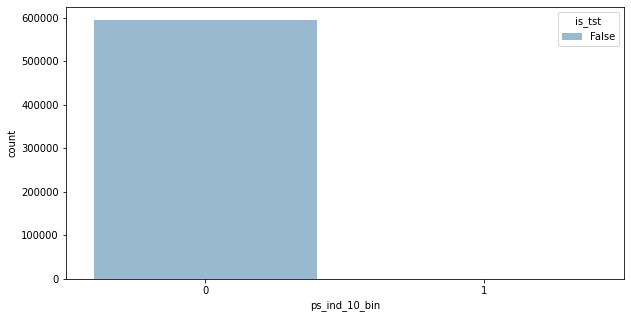

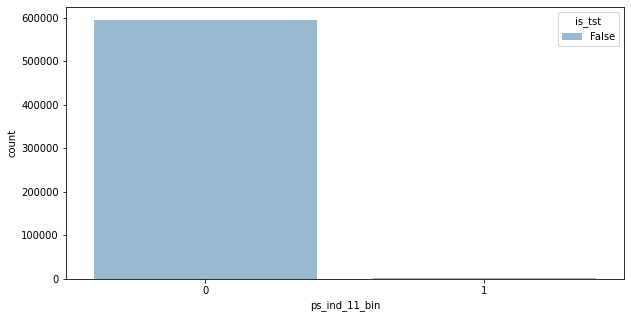

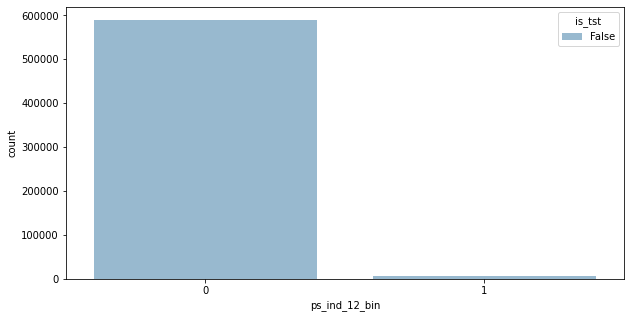

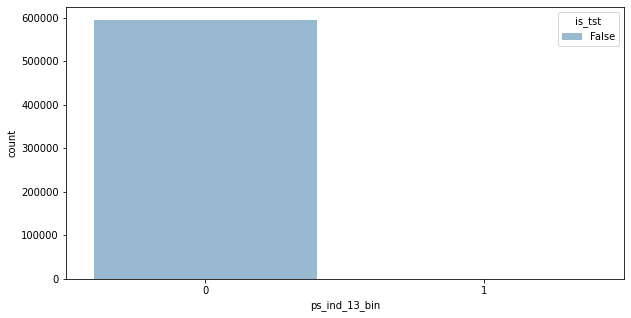

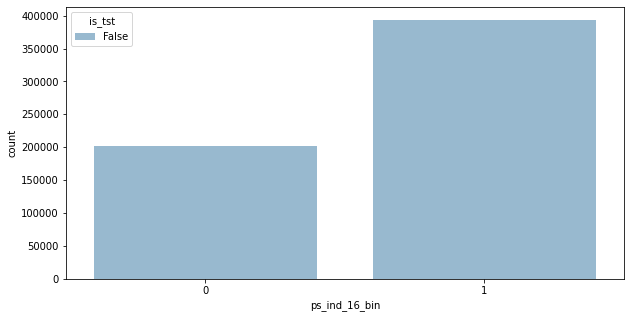

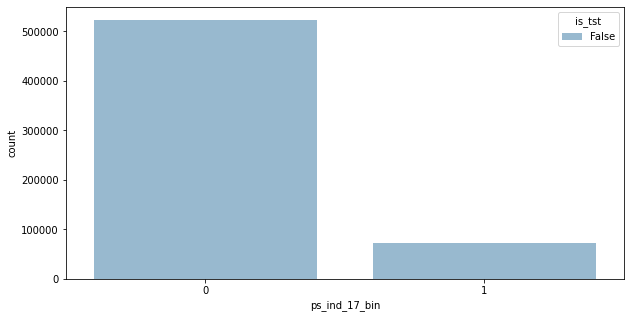

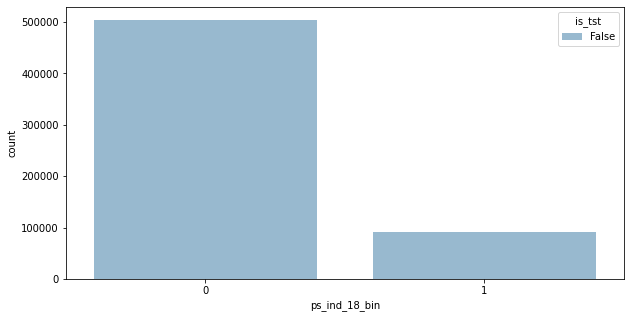

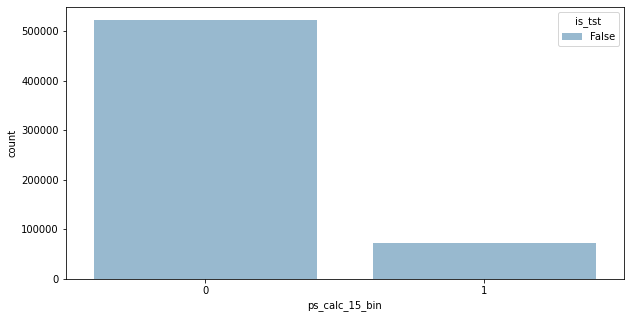

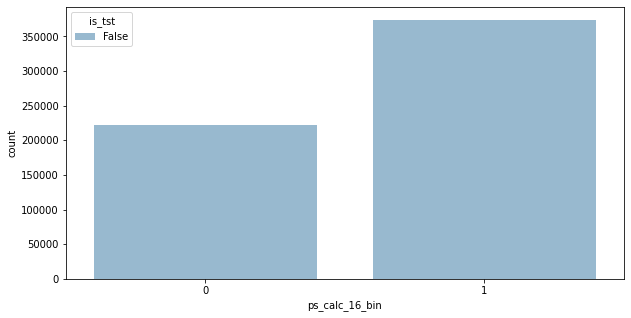

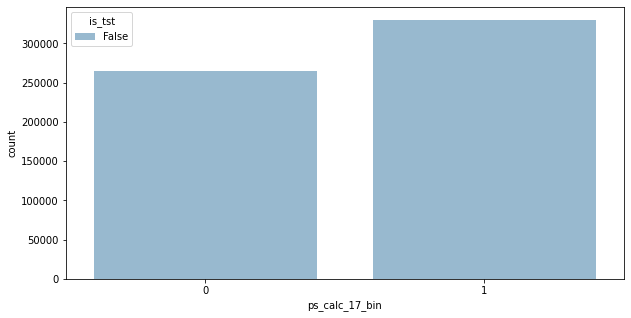

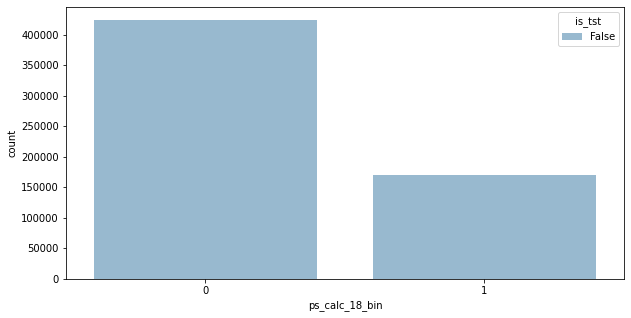

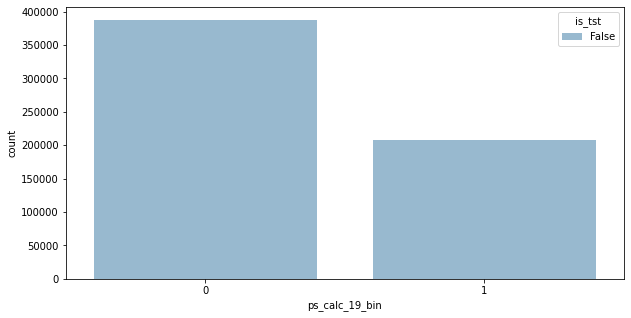

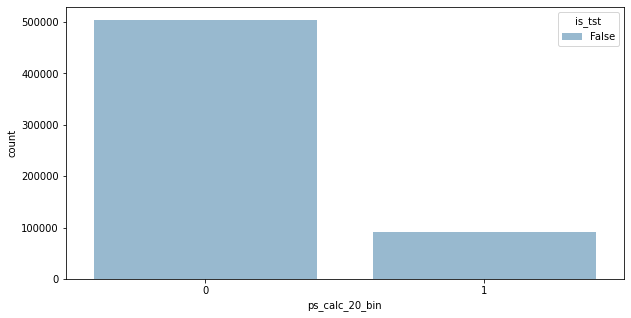

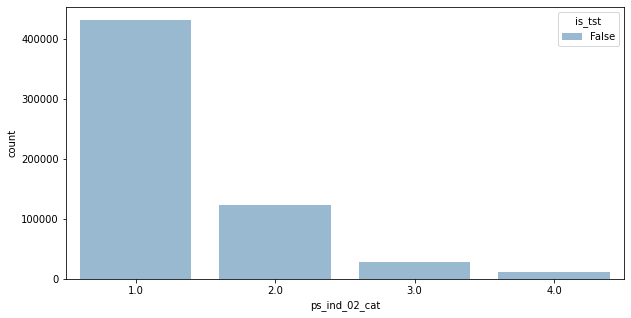

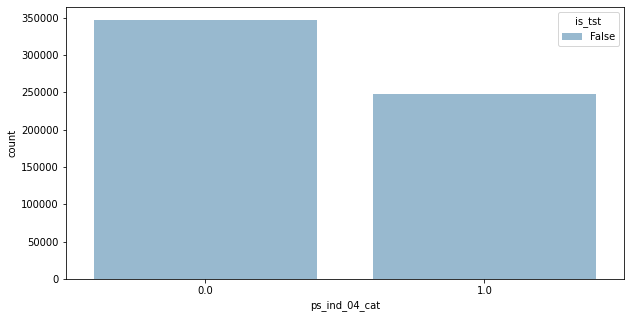

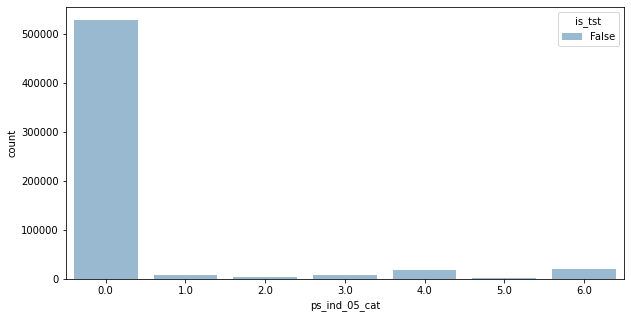

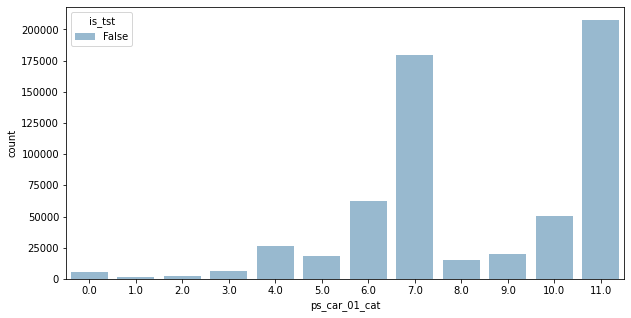

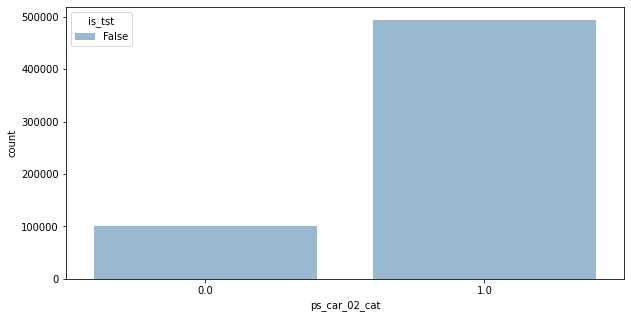

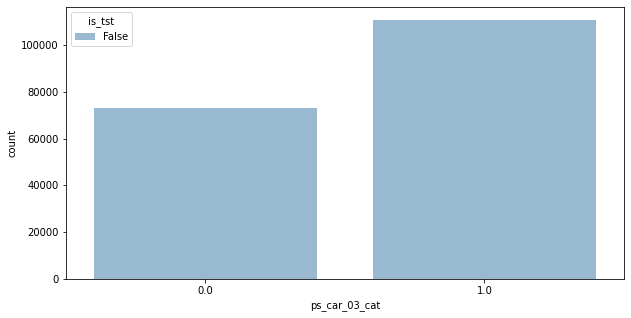

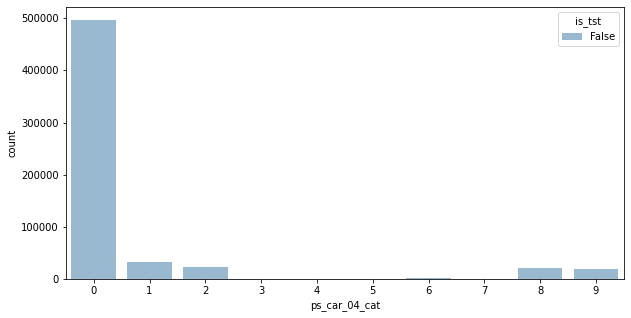

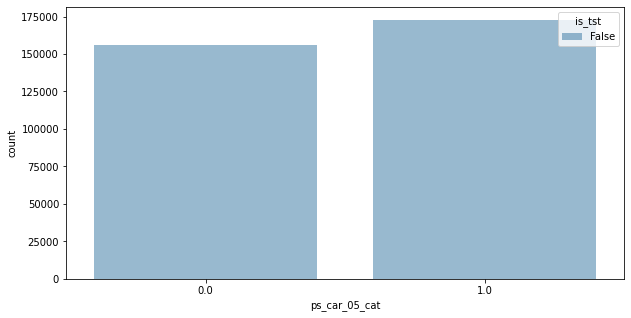

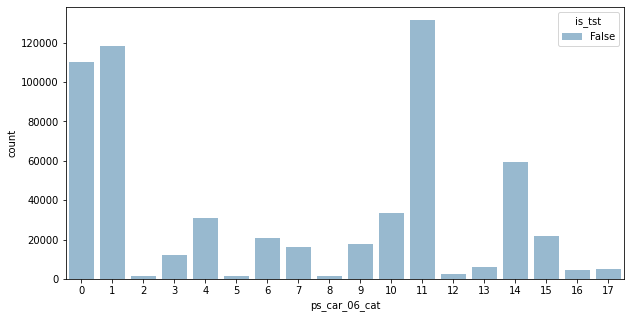

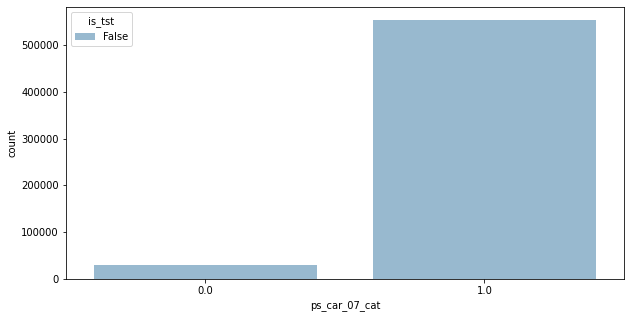

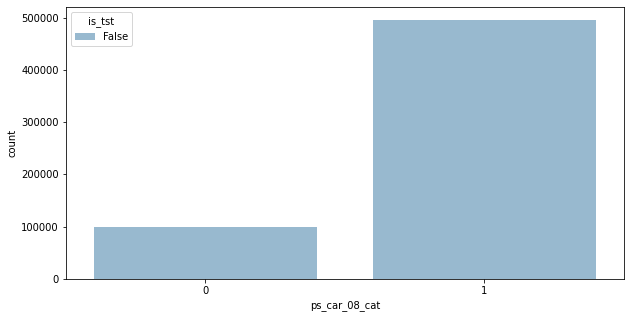

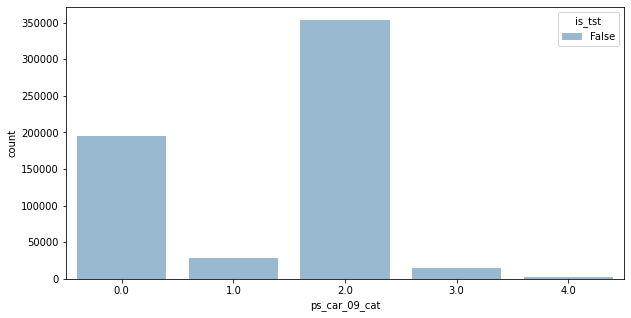

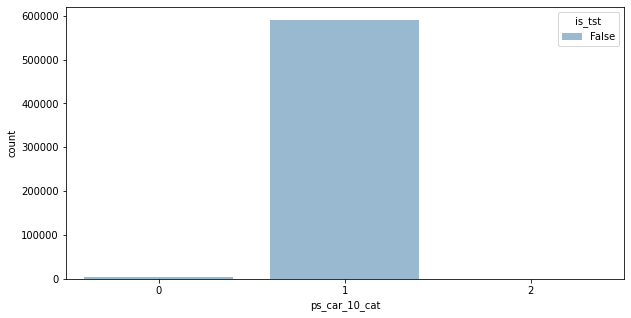

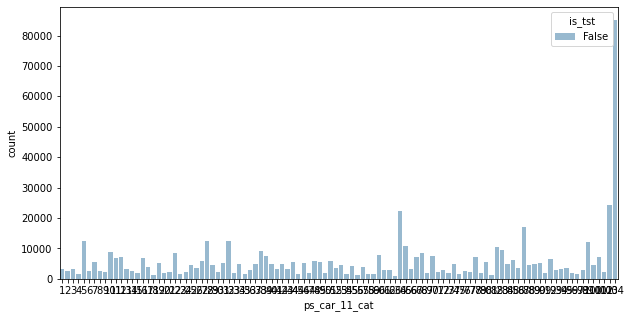

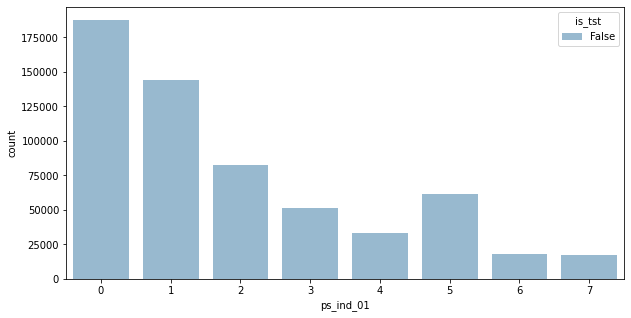

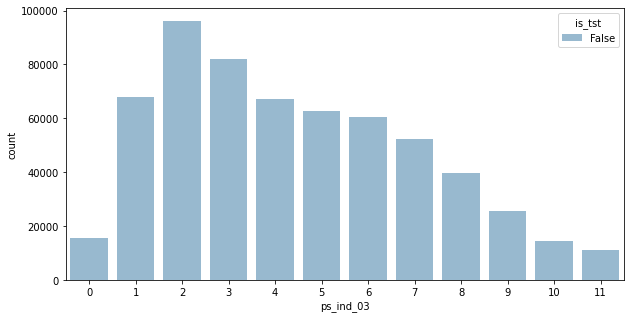

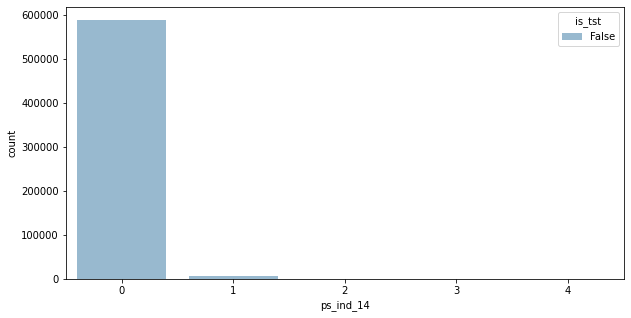

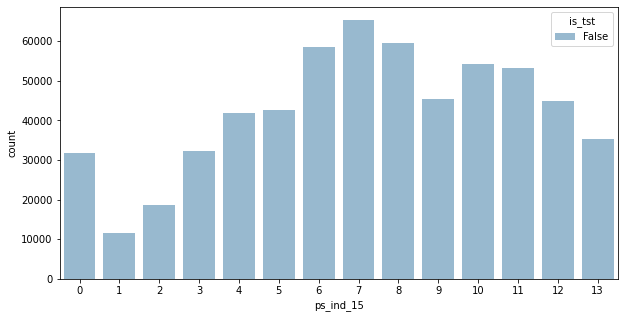

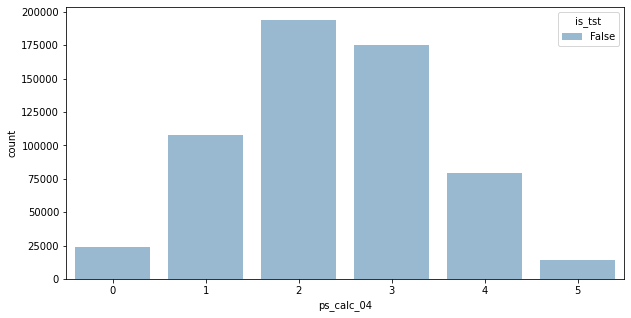

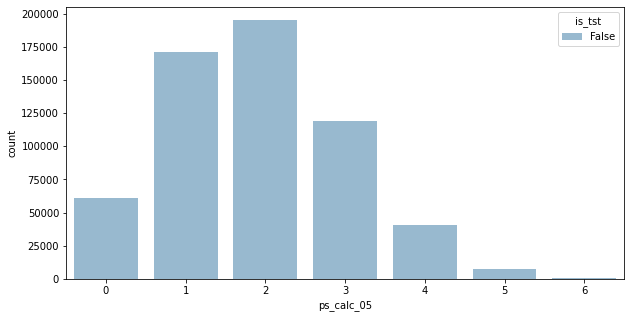

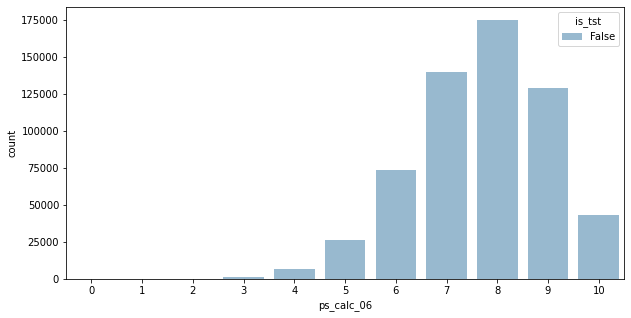

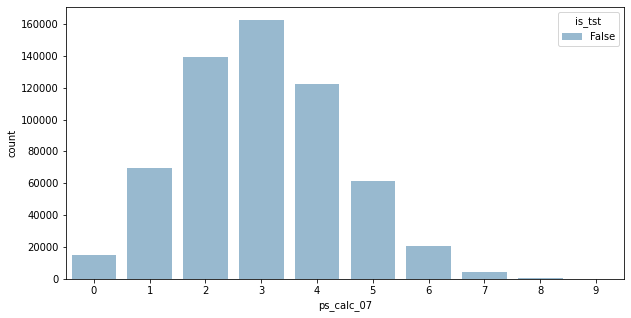

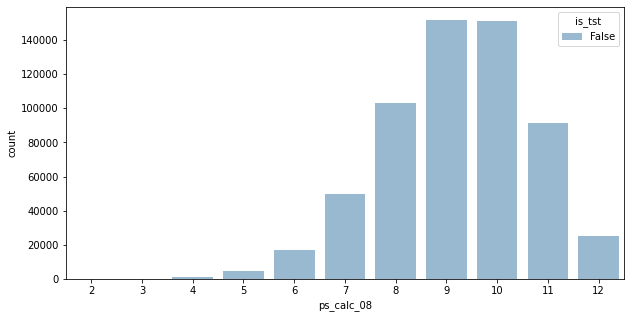

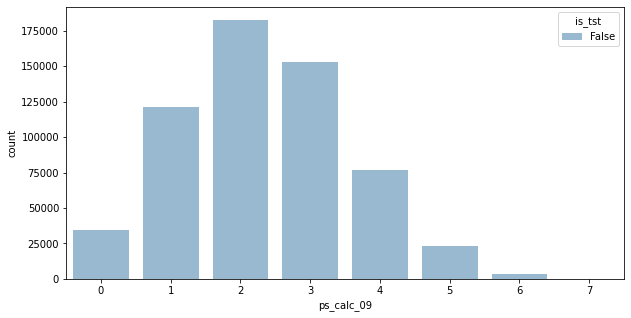

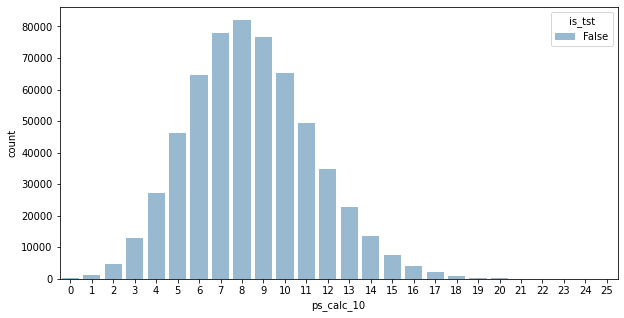

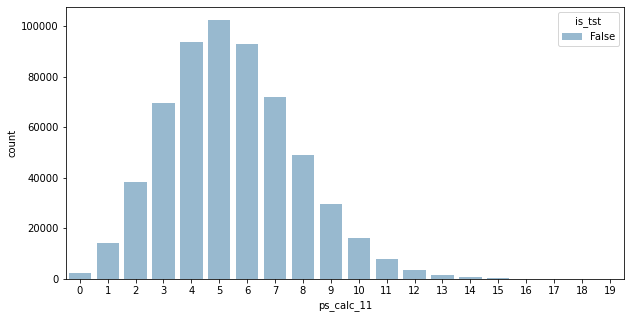

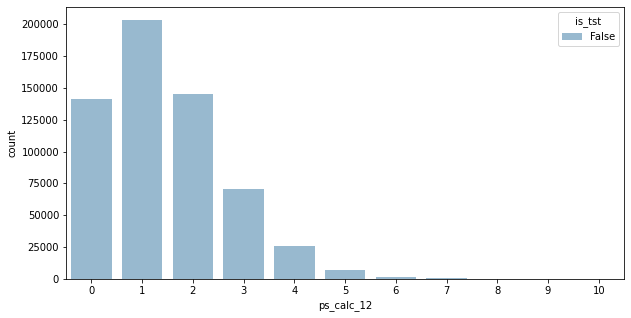

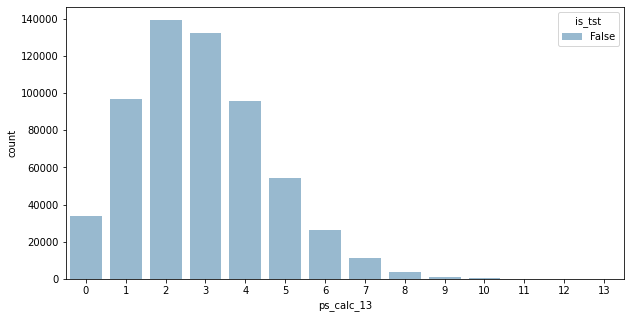

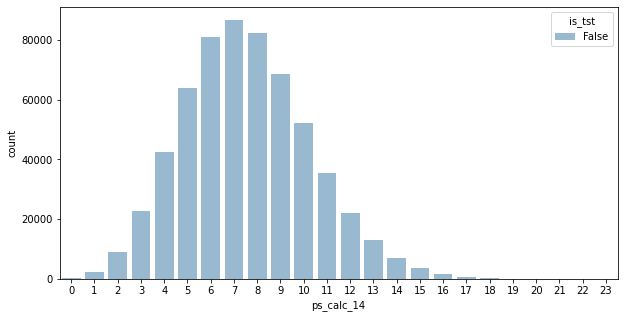

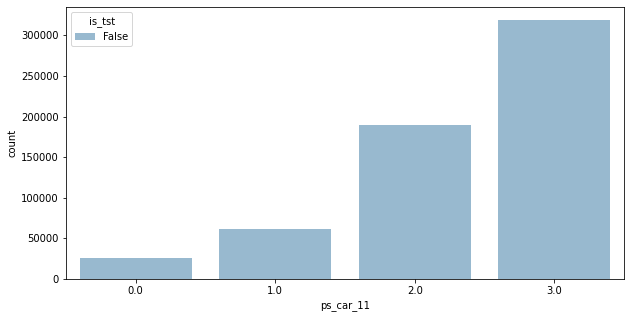

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 테스트 데이터를 구별하기 위한 'is_tst' 변수 생성
train_df['is_tst'] = train_df['target'].isnull()

# 이진 변수, 범주형 변수 그리고 정수형 변수를 시각화
for col in binary + category + integer:
  bar_plot(col, train_df, 'is_tst')

# Baseline 모델

##데이터 전처리

본 경진대회에서는 전처리 과정이 불필요하므로 데이터만 읽어온다.

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c porto-seguro-safe-driver-prediction

Saving kaggle.json to kaggle.json
 57% 17.0M/30.0M [00:00<00:00, 67.7MB/s]
100% 30.0M/30.0M [00:00<00:00, 86.1MB/s]
 74% 33.0M/44.4M [00:00<00:00, 70.1MB/s]
100% 44.4M/44.4M [00:00<00:00, 100MB/s] 
  0% 0.00/2.12M [00:00<?, ?B/s]
100% 2.12M/2.12M [00:00<00:00, 145MB/s]


In [ ]:
!unzip '/content/test.csv.zip'
!unzip '/content/sample_submission.csv.zip'
!unzip '/content/train.csv.zip'

Archive:  /content/test.csv.zip
  inflating: test.csv                
Archive:  /content/sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  /content/train.csv.zip
  inflating: train.csv               


In [ ]:
import pandas as pd

# 훈련/테스트 데이터 로드
train = pd.read_csv("/content/train.csv")
train_label = train['target']
train_id = train['id']
del train['target'], train['id']

test = pd.read_csv('/content/test.csv')
test_id = test['id']
del test['id']

## 피처 엔지니어링

본 Baseline 모델에서 수행하는 3가지 기초적인 피처 엔지니어링
1. 결측값의 개수를 나타내는 missing 변수
2. 이진 변수들의 총합
3. Target Encoding 파생 변수

In [ ]:
# 파생 변수 01 : 결측값을 의미하는 "-1"의 갯수 카운팅
train['missing'] = (train==-1).sum(axis=1).astype(float)
test['missing'] = (test==-1).sum(axis=1).astype(float)

# 파생 변수 02 : 이진 변수의 합
bin_features = [c for c in train.columns if 'bin' in c]
train['bin_sum'] = train[bin_features].sum(axis=1)
test['bin_sum'] = test[bin_features].sum(axis=1)

# 파생 변수 03 : 단일변수 타겟 비율 분석으로 선정한 변수를 기반으로 Target Encoding을 수행
# Target Encoding은 교차 검증 과정에서 행
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
            'ps_ind_12_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 
            'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 
            'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 
            'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'ps_ind_01', 
            'ps_ind_03', 'ps_ind_15', 'ps_car_11']

* 첫 번째 파생 변수 : 운전자 별 결측값 갯수 카운팅
  * 가능성 적인 측면에 열리는 길이 생긴다.
  * 신규 운전자와 숙련 운전자의 차이를 의미할 수 있음
  * 데이터 출처에 대한 정보를 제공받을 가능성
* 두 번째 파생 변수 : 이진 변수 값의 합
  * 변수 간의 상호 작용으로 얻을 수 있는 고차원 정보 추출
  * 이진 변수는 변수 별 파생 변수에 대한 영향력이 균등 (전부 0, 1 값으로 이루어져 있기 때문)
* 세 번째 파생 변수 : 데이터 탐색 분석 과정에서 선별한 일부 변수를 대상으로 Target Encoding

## LightGBM 모델 정의

* 모델 복잡도 조절 : num_leaves, max_bin, min_child_sample
* 과적합 방지 : features_fraction, subsample, max_drop

In [ ]:
# 모델 설정값
num_boost_round = 10000
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": 0.1,
          "num_leaves": 15,
          "max_bin": 256,
          "feature_fraction": 0.6,
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": False,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9,
          "seed": 2018
}

* 
* 
* learning_rate : 학습률
* num_leaves : 이진트리이기 때문에 그 트리가 가질 수 있는 최대 잎사귀 수
* 
* 
